# チャネル結合法

緒方 一介『量子散乱理論への招待―フェムトの世界を見る物理―』(共立出版, 2017) の 第7章「チャネル結合と光学ポテンシャルの起源」のプロットを再現するコードです.

次の環境での動作を確認しています.

> MacBook Pro (13-inch, 2019, Four Thunderbolt 3 ports)
> - CPU: 2.4GHz Quad-Core Intel Core i5
> - RAM: 16GB
> - Julia v1.6.0
>     - IJulia v1.23.2
>     - SpecialFunctions v1.8.1
>     - Plots v1.25.2
>     - LaTeXStrings v1.3.0
>     - OffsetArrays v1.10.8

**実行方法**

上から順にセルを実行していってください.
セルの実行はセルを選択した上で `Shift` + `ENTER` などで可能です.

- `CTRL` + `ENTER` : セルを実行.
- `Shift` + `ENTER` : セルを実行 + 次のセルに移動.
- `Alt` + `ENTER` : セルを実行 + 下に新しいセルを挿入.

セルをダブルクリックすることでセルの内容を書き換えることができるので, パラメータを変えるなどして遊んでみてください.

※説明の数式の式番号はテキストのものと一致させています.
そのため, 式番号に飛びがあったり, 式番号の順番が変わっていたりします.

※実装の都合上, 関数の引数の順番をテキストと変えているものがあります.
- (例) テキスト: $\psi_0 (b, z)$ → このNotebook: $\psi_0 (z, b)$

## チャネル結合方程式

上の設定の下で, 反応系の波動関数は

$$
\Psi(\xi, \boldsymbol{R})
= \chi_0(\boldsymbol{R}) \Phi_0(\xi)
+ \chi_1(\boldsymbol{R}) \Phi_1(\xi)
\tag{7.5}
\label{eq:Psi75}
$$

と表せる.
ここで,

- $\Phi_0(\xi)$ : 原子核の基底状態の波動関数.
- $\Phi_1(\xi)$ : 原子核の励起状態の波動関数.
- $\chi_c(\boldsymbol{R}) \ (c = 0 \mathrm{or} 1)$ : 対応する中性子-原子核の散乱波.
- $\xi$ : 原子核に含まれる$A$個の核子の自由度をまとめて表したもの.

である.
いま, 原子核の状態として基底状態と励起状態の2つのみが存在すると仮定しているので, 原子核の内部ハミルトニアンを$\hat{h}$と書くと,

$$
\int d\xi \ \Phi_{c^{\prime}}^{\ast}(\xi) \hat{h} \Phi_{c}(\xi)
= \varepsilon_c \delta_{c^{\prime}c}
\tag{7.6}
\label{eq:intPhi76}
$$

が成り立つ.

原子核の密度 $\rho_{c^{\prime}c}(\boldsymbol{r})$ を次のように定義する.

$$
\rho_{c^{\prime}c}(\boldsymbol{r})
= \int
    \Phi_{c^{\prime}}^{\ast}(\xi)
    \left[
        \sum_{i=1}^{A} \delta (\boldsymbol{r} - \boldsymbol{r}_i)
    \right]
    \Phi_{c}(\xi)
d\xi
\tag{7.7}
\label{eq:defrho77}
$$

ここで, $\boldsymbol{r}_i$は原子核内の$i$番目の核子の座標である.
$\rho_{c^{\prime}c}(\boldsymbol{r})$ は

$$
\int d \boldsymbol{r} \rho_{c^{\prime}c}(\boldsymbol{r}) 
= A \delta_{c^{\prime}c}
\tag{7.8}
\label{eq:normrho78}
$$

が成り立つように規格化されている.

$\Psi(\xi, \boldsymbol{R})$が満たすべきSchrödinger Eq. は

$$
\left[
    \hat{T}_{\boldsymbol{R}}
    + \sum_{i=1}^{A} v(|\boldsymbol{r}_i - \boldsymbol{R}|)
    + \hat{h}
    - E_{\mathrm{tot}}
\right]
\Psi(\xi, \boldsymbol{R})
= 0
\tag{7.9}
\label{eq:schrodinger79}
$$

である.
$v$は2核子間の相互作用(中心力ポテンシャルとする)である.
これに$\eqref{eq:Psi75}$を代入すると, 

$$
\left[
    \hat{T}_{\boldsymbol{R}}
    + \sum_{i=1}^{A} v(|\boldsymbol{r}_i - \boldsymbol{R}|)
    + \hat{h}
    - E_{\mathrm{tot}}
\right]
\left[
    \chi_0(\boldsymbol{R}) \Phi_0(\xi)
    + \chi_1(\boldsymbol{R}) \Phi_1(\xi)
\right]
= 0
\tag{7.12}
\label{eq:schrodinger712}
$$

を得る.

ここで, ポテンシャル$V_{c^{\prime}c}$を

$$
V_{c^{\prime}c}(\boldsymbol{R})
\equiv \int
    \Phi_{c^{\prime}}^{\ast}(\xi)
    \left[
        \sum_{i=1}^{A} v (|\boldsymbol{r}_i - \boldsymbol{R}|)
    \right]
    \Phi_{c}(\xi)
d\xi
\tag{7.10}
\label{eq:defV710}
$$

と定義する.
$V_{c^{\prime}c}$はデルタ関数を使うことによって

$$
V_{c^{\prime}c}(\boldsymbol{R})
= \int
    \Phi_{c^{\prime}}^{\ast}(\xi)
    \left[
        \sum_{i=1}^{A} v (|\boldsymbol{r} - \boldsymbol{R}|)
        \delta(\boldsymbol{r} - \boldsymbol{r}_i)
    \right]
    \Phi_{c}(\xi)
d\xi d\boldsymbol{r}
= \int
    \rho_{c^{\prime}c}(\boldsymbol{r}) v(|\boldsymbol{r}-\boldsymbol{R}|)
d\boldsymbol{r}
\tag{7.11}
\label{eq:V711}
$$

となる.

$\eqref{eq:schrodinger712}$の左から$\Phi_0^{\ast}$, $\Phi_1^{\ast}$を乗じて, $\xi$積分を実行すると, $\eqref{eq:intPhi76}$, $\eqref{eq:defV710}$, $\eqref{eq:V711}$により,

$$
\left[
    \hat{T}_{\boldsymbol{R}}
    + V_{00}(\boldsymbol{R})
    - E_{0}
\right] \chi_0(\boldsymbol{R})
= -V_{01}(\boldsymbol{R}) \chi_1(\boldsymbol{R})
\tag{7.13}
\label{eq:CC713}
$$

$$
\left[
    \hat{T}_{\boldsymbol{R}}
    + V_{11}(\boldsymbol{R})
    - E_{1}
\right] \chi_1(\boldsymbol{R})
= -V_{10}(\boldsymbol{R}) \chi_0(\boldsymbol{R})
\tag{7.14}
\label{eq:CC714}
$$

を得る.
この方程式のセット$\eqref{eq:CC713}$, $\eqref{eq:CC714}$をチャネル結合方程式(coupled-channel equations)と呼ぶ.
このチャネル結合方程式を解くのが本章の重要な課題である.

## アイコナールチャネル方程式

チャネル結合方程式 $\eqref{eq:CC713}$, $\eqref{eq:CC714}$ を解くにあたり, アイコナール近似を用いる.
つまり, $\chi_0(\boldsymbol{R})$, $\chi_1(\boldsymbol{R})$を

$$
\chi_0(\boldsymbol{R})
= \psi_0 (z, b) \frac{1}{(2\pi)^{3/2}}\exp(
    i \boldsymbol{K}_0 \cdot \boldsymbol{R}
)
= \psi_0 (z, b) \frac{1}{(2\pi)^{3/2}}\exp(i K_0 z)
\tag{7.15}
\label{eq:eikonalchi0715}
$$

$$
\chi_1(\boldsymbol{R})
= \psi_1 (z, b) \frac{1}{(2\pi)^{3/2}}\exp(
    i \boldsymbol{K}_1 \cdot \boldsymbol{R}
)
= \psi_1 (z, b) \frac{1}{(2\pi)^{3/2}}\exp(i K_1 z)
\tag{7.16}
\label{eq:eikonalchi1716}
$$

と表し, 

$$
\nabla^2_{\boldsymbol{R}} \psi_0 (z,b) \approx 0,
\quad
\nabla^2_{\boldsymbol{R}} \psi_1 (z,b) \approx 0.
\tag{7.17}
\label{eq:eikonalapprox717}
$$

と近似する.

ここで,

$$
K_0 = \frac{
    \sqrt{2 \mu E_0}
}{\hbar},
\quad
K_1 = \frac{
    \sqrt{2 \mu E_1}
}{\hbar},
\quad
\mu = \frac{mM}{m+M}
\tag{7.18}
\label{eq:K718}
$$

である.

ここでは計算の過程はテキストに譲って省略するが, $\psi_0$, $\psi_1$の形式解:

$$
\begin{align}
\psi_0(z,b) &= \exp\left[
    \frac{1}{i\hbar c \beta_0}
    \int_{-\infty}^{z} d z^{\prime} V_{00}(z^{\prime}, b)
\right] \\
&\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} \left[
        \frac{1}{i\hbar c \beta_0}
        V_{01}(z^{\prime}, b)
        \psi_1(z^{\prime}, b)
        \exp\left(
            i(K_1 - K_0)z^{\prime}
        \right)
        \exp\left(
            - \frac{1}{i\hbar c \beta_0}
            \int_{-\infty}^{z^{\prime}} d z^{\prime\prime} V_{00}(z^{\prime\prime}, b)
        \right)
    \right]
    + 1
\right\}
\tag{7.36}
\label{eq:psi0736} \\
\psi_1(z,b) &= \exp\left[
    \frac{1}{i\hbar c \beta_1}
    \int_{-\infty}^{z} d z^{\prime} V_{11}(z^{\prime}, b)
\right] \\
&\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} \left[
        \frac{1}{i\hbar c \beta_1}
        V_{10}(z^{\prime}, b)
        \psi_0(z^{\prime}, b)
        \exp\left(
            i(K_0 - K_1)z^{\prime}
        \right)
        \exp\left(
            - \frac{1}{i\hbar c \beta_1}
            \int_{-\infty}^{z^{\prime}} d z^{\prime\prime} V_{11}(z^{\prime\prime}, b)
        \right)
    \right]
\right\}
\tag{7.37}
\label{eq:psi1737}
\end{align}
$$

を得る.

$\eqref{eq:psi0736}$の右辺は$\psi_1$を含んでおり, また, $\eqref{eq:psi1737}$の右辺は$\psi_0$を含んでいるので,
$\psi_0$, $\psi_1$を求めるには数値計算が必要となる.

## 反復法

チャネル結合方程式の数値解法のうち, 最も簡単なものが反復法(iterative method, 逐次近似法)である.
反復法とは, まず初期解を設定して, 逐次的に計算を繰り返して初期解を真の解に近づけていく方法である.

いま, 反復法によって解くべき方程式はアイコナール近似の結果, 得られた$\eqref{eq:psi0736}$, $\eqref{eq:psi1737}$である.

$\eqref{eq:psi0736}$, $\eqref{eq:psi1737}$を形式的に

$$
\psi_0(z,b) = \hat{\mathcal{O}}_0 \psi_1(z,b),
\quad
\psi_1(z,b) = \hat{\mathcal{O}}_1 \psi_0(z,b)
\tag{7.38}
\label{eq:psis738}
$$

と表し, $n$回目の反復によって得られた解を$\psi_c^{(n)}$($c = 0$ or $1$)と書くことにする.

反復法のアイデアは次の通りである.

0. 初期解 $\psi_0^{(0)}$, $\psi_1^{(0)}$ を用意する.
1. $\psi_0^{(1)}$, $\psi_1^{(1)}$を
    $$
    \psi_0^{(1)}(z,b) = \hat{\mathcal{O}}_0 \psi_1^{(0)}(z,b),
    \quad
    \psi_1^{(1)}(z,b) = \hat{\mathcal{O}}_1 \psi_0^{(0)}(z,b)
    \tag{7.39}
    \label{eq:iter1739}
    $$
    によって求める.
2. １と同様に
    $$
    \psi_0^{(n)}(z,b) = \hat{\mathcal{O}}_0 \psi_1^{(n-1)}(z,b),
    \quad
    \psi_1^{(n)}(z,b) = \hat{\mathcal{O}}_1 \psi_0^{(n-1)}(z,b)
    \tag{7.39}
    \label{eq:itern740}
    $$
    によって$\left\{\psi_0^{(2)}, \psi_1^{(2)}\right\}$, $\cdots$, $\left\{\psi_0^{(n)}, \psi_1^{(n)}\right\}$を求めていく.

ある程度試行を繰り返したところで,

$$
\psi_0^{(N)}(z,b) \simeq \psi_0^{(N-1)}(z,b),
\quad
\psi_1^{(N)}(z,b) \simeq \psi_1^{(N-1)}(z,b)
$$

となれば, これ以上, 反復を繰り返しても計算結果は変化しないので, $\psi_0^{(N)}(z,b)$, $\psi_1^{(N)}(z,b)$を解とみなす.

それでは実際に数値計算を行ってみよう.

## 数値計算の準備

### Packageのimportなど

まず, グラフ描画など, 使用するPackageをimportする.

In [1]:
using SpecialFunctions
using Plots
using Plots.PlotMeasures
using LaTeXStrings
using Base.Threads
using OffsetArrays
using DelimitedFiles

次にグラフ描画(`Plots`)の設定を行う.
ただ体裁を整えるための設定なので, ここを理解する必要はない.

In [2]:
default(
    size=(800,600),
    linewidth=2,
    grid=true,
    gridstyle=:dash,
    gridalpha=0.8,
    fontfamily="Times",
    titlefontsize=20,
    labelfontsize=18,
    tickfontsize=12,
    legendfontsize=16,
    foreground_color_legend=nothing,
    background_color_legend=colorant"rgba(255,255,255,0.6)"
)

今回の計算では**スレッド並列**を利用して計算時間の短縮を試みる.

環境変数 `JULIA_NUM_THREADS` を設定することで並列数を変更できる.
`jupyter` を起動する前に, ターミナルエミュレータで次のように実行すればよい.

並列スレッド数を4に設定する場合:
- `bash`, `zsh`

```sh
export JULIA_NUM_THREAD=4
```

- `csh`, Windows CMD

```sh
set JULIA_NUM_THREADS=4
```

- Windows Poershell

```powershell
$env:JULIA_NUM_THREADS=4
```

Multi-Threadingについての詳細は[Official Docs](https://docs.julialang.org/en/v1/manual/multi-threading/)を参照.

現在の並列数を確認する.

In [3]:
println("並列スレッド数: $(nthreads())")

並列スレッド数: 4


### Constants & Parametersの設定

物理定数の設定

In [4]:
ħc = 197.3269804593025 # MeV⋅fm ;
AMU = 931.49410242 # MeV/c² ;

数値計算を行うにあたり, 原子核の密度$\rho_{c^{\prime}c}$を設定する必要がある.
テキストに従い, $\rho_{c^{\prime}c}(r)$ を次のように設定する.

$$
\rho_{00}(r)
= \mathcal{C}_0^2
\exp\left(
    - \frac{r^2}{r_0^2}
\right)
\tag{7.42}
\label{eq:rho00}
$$

$$
\rho_{00}(r)
= \mathcal{C}_1^2
\left(
    \frac{3}{2} - \frac{r^2}{r_0^2}
\right)^2
\exp\left(
    - \frac{r^2}{r_0^2}
\right)
\tag{7.43}
\label{eq:rho11}
$$

$$
\rho_{10}(r)
= \mathcal{C}_0 \mathcal{C}_1
\left(
    \frac{3}{2} - \frac{r^2}{r_0^2}
\right)
\exp\left(
    - \frac{r^2}{r_0^2}
\right)
= \rho_{01}(r)
\tag{7.43}
\label{eq:rho10}
$$

ここで, $\mathcal{C}_0$, $\mathcal{C}_1$は実数とする.

$\mathcal{C}_0$, $\mathcal{C}_1$は規格化条件:

$$
\int d\boldsymbol{r} \rho_{c^{\prime}c}(\boldsymbol{r})
= A \delta_{c^{\prime}c}
\tag{7.8}
$$

によって定めることがきる.

$$
\mathcal{C}_0^2
= \frac{A}{r_0^3 \pi^{3/2}} ,
\quad
\mathcal{C}_1^2
= \frac{2}{3}
\frac{A}{r_0^3 \pi^{3/2}}
= \frac{2}{3} \mathcal{C}_0^2 .
$$


2核子間の相互作用はゼロレンジ型:

$$
v(|\boldsymbol{r} - \boldsymbol{R}|)
= \bar{v}_0 \delta(\boldsymbol{r} - \boldsymbol{R})
$$

を採用する.
この結果, ポテンシャル$V_{c^{\prime}c}$は

$$
V_{c^{\prime}c}(\boldsymbol{R})
= \int d \boldsymbol{r} \rho_{c^{\prime}c}(\boldsymbol{r}) v(|\boldsymbol{r}-\boldsymbol{R}|)
= \bar{v}_0 \rho_{c^{\prime}c}(\boldsymbol{R})
$$

となる.

テキストp.131に従い, 反応系の各種パラメータを次のように設定する.

- 中性子の入射エネルギー: $E_{\mathrm{in}} = 100\mathrm{MeV}$
- 原子核の基底状態のエネルギー固有値: $\varepsilon_0 = -15\mathrm{MeV}$
- 原子核の励起状態のエネルギー固有値: $\varepsilon_1 = -5\mathrm{MeV}$
- 原子核の質量数: $A=10$
- $r_0 = 2\mathrm{fm}$
- $\bar{v}_0 = -250\mathrm{MeV \cdot fm^3}$ (テキストでは負号が抜けているので注意)

これをコードに落とし込む.

In [5]:
Eᵢₙ = 100.0 # MeV ;
r₀ = 2.0 # fm ;
r₀² = r₀^2 # fm² ;
ε₀ = -15.0 # MeV ;
ε₁ = -5.0 # MeV ;
A = 10 # Target Nuclear Mass Number ; unitless ;
mₙ = 1.00866491595 # Neutron mass in AMU ;
v̄₀ = OffsetArray([
    -250.0 -250.0
    -250.0 -250.0
], 0:1, 0:1) # MeV⋅fm³ ;

$\mathcal{C}_0$, $\mathcal{C}_1$の計算

In [6]:
C₀² = A / (r₀^3 * π^(3/2));
C₁² = 2/3 * A / (r₀^3 * π^(3/2));
C₀ = √C₀²;
C₁ = √C₁²;
C₀C₁ = C₀ * C₁;

次の量を計算しておく.

- 換算質量$\mu$
- 弾性チャネル, 非弾性チャネルのエネルギー $E_0$, $E_1$
- 弾性チャネル, 非弾性チャネルの波数 $K_0$, $K_1$
- $\beta_0 = \frac{v_0}{c} = \frac{\hbar c K_0}{\mu c}$, $\beta_1 = \frac{v_1}{c} = \frac{\hbar c K_1}{\mu c}$

In [7]:
M = A # AMU ;
μ = M*mₙ/(M+mₙ)*AMU # MeV ;
μc² = μ # MeV ;
E₀ = M / (M+mₙ) * Eᵢₙ # MeV ;
E₁ = E₀ + ε₀ - ε₁ # MeV ;
K₀ = √(2 * μc² * E₀) / ħc # fm⁻¹ ;
K₁ = √(2 * μc² * E₁) / ħc # fm⁻¹ ;
K₀² = 2 * μc² * E₀ / ħc^2 # fm⁻² ;
K₁² = 2 * μc² * E₁ / ħc^2 # fm⁻² ;
β₀ = ħc * K₀ / μc² # v₀ in c ;
β₁ = ħc * K₁ / μc² # v₁ in c ;

### 密度$\rho_{c^{\prime}c}(r)$の実装

前述の通り, 密度$\rho_{c^{\prime}c}(r)$には次の関数を使う.
これを実際にプログラム上で実装する.

$$
\rho_{00}(r)
= \mathcal{C}_0^2
\exp\left(
    - \frac{r^2}{r_0^2}
\right)
\tag{7.42}
\label{eq:rho00}
$$

$$
\rho_{00}(r)
= \mathcal{C}_1^2
\left(
    \frac{3}{2} - \frac{r^2}{r_0^2}
\right)^2
\exp\left(
    - \frac{r^2}{r_0^2}
\right)
\tag{7.43}
\label{eq:rho11}
$$

$$
\rho_{10}(r)
= \mathcal{C}_0 \mathcal{C}_1
\left(
    \frac{3}{2} - \frac{r^2}{r_0^2}
\right)
\exp\left(
    - \frac{r^2}{r_0^2}
\right)
= \rho_{01}(r)
\tag{7.43}
\label{eq:rho10}
$$

In [8]:
function ρ₀₀(r)
    r² = r^2
    C₀² * exp(-r²/r₀²)
end

function ρ₁₁(r)
    r² = r^2
    C₁² * (3/2 - r²/r₀²)^2 * exp(-r²/r₀²)
end

function ρ₁₀(r)
    r² = r^2
    C₀C₁ * (3/2 - r²/r₀²) * exp(-r²/r₀²)
end

ρ₀₁(r) = ρ₁₀(r);

### ポテンシャル $V_{c^{\prime}c}(R)$の実装

$$
V_{c^{\prime}c}(\boldsymbol{R})
= \int d \boldsymbol{r} \rho_{c^{\prime}c}(\boldsymbol{r}) v(|\boldsymbol{r}-\boldsymbol{R}|)
= \bar{v}_0 \rho_{c^{\prime}c}(\boldsymbol{R})
$$

In [9]:
V₀₀(R) = ρ₀₀(R) * v̄₀[0,0];
V₁₁(R) = ρ₁₁(R) * v̄₀[1,1];
V₁₀(R) = ρ₁₀(R) * v̄₀[1,0];
V₀₁(R) = ρ₀₁(R) * v̄₀[0,1];

In [10]:
V₀₀(z,b) = V₀₀(√(z^2+b^2));
V₁₁(z,b) = V₁₁(√(z^2+b^2));
V₁₀(z,b) = V₁₀(√(z^2+b^2));
V₀₁(z,b) = V₀₁(√(z^2+b^2));

ポテンシャル $V_{c^{\prime}c}(R)$をプロットしてみる.

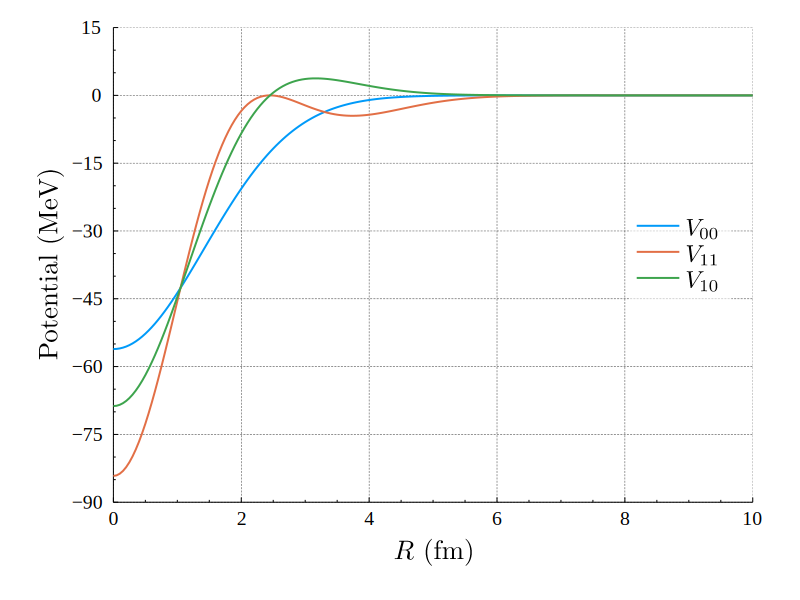

In [11]:
R = 0:0.05:10
plt=plot(
    R, V₀₀.(R),
    label=L"V_{00}",
    xlims=(0, 10),
    ylims=(-90,15),
    xticks=0:2:10,
    yticks=-90:15:15,
    xminorticks=4,
    yminorticks=3,
    top_margin=5mm,
    margin=10mm,
    legend=:right,
)
plot!(
    R, V₁₁.(R),
    label=L"V_{11}",
)
plot!(
    R, V₁₀.(R),
    label=L"V_{10}",
)
xlabel!(
    L"R \ \mathrm{(fm)}"
)
ylabel!(
    L"\mathrm{Potential \ (MeV)}"
)
savefig("out/potential.svg")
display(plt)

## $\psi_0(z,b)$と$\psi_1(z,b)$を反復法で求める($b=0$)

$b=0$として反復法を使って$\psi_0(z,b)$, $\psi_1(z,b)$を求めよう.

### 積分の実装

反復法について

> アイコナールチャネル結合方程式を形式的に 
$$
\psi_0(z,b) = \hat{\mathcal{O}}_0 \psi_1(z,b),
\quad
\psi_1(z,b) = \hat{\mathcal{O}}_1 \psi_0(z,b)
\tag{7.38}
\label{eq:psis738}
$$
と表して,
$$
\psi_0^{(n)}(z,b) = \hat{\mathcal{O}}_0 \psi_1^{(n-1)}(z,b),
\quad
\psi_1^{(n)}(z,b) = \hat{\mathcal{O}}_1 \psi_0^{(n-1)}(z,b)
\tag{7.39}
\label{eq:itern740}
$$
の繰り返しによって$\psi_0(z,b)$, $\psi_1(z,b)$を求める.

と説明した.
この説明だけを見れば簡単なように感じるかもしれないが, 実際にコードを記述するに際して面倒な部分を$\hat{\mathcal{O}}_c$に押し付けていることを思い出さなければならない.
$\hat{\mathcal{O}}_c$を使わずに書いた**生の**アイコナールチャネル結合方程式は次のようであった.

$$
\begin{align}
\psi_0(z,b) &= \exp\left[
    \frac{1}{i\hbar c \beta_0}
    \int_{-\infty}^{z} d z^{\prime} V_{00}(z^{\prime}, b)
\right] \\
&\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} \left[
        \frac{1}{i\hbar c \beta_0}
        V_{01}(z^{\prime}, b)
        \psi_1(z^{\prime}, b)
        \exp\left(
            i(K_1 - K_0)z^{\prime}
        \right)
        \exp\left(
            - \frac{1}{i\hbar c \beta_0}
            \int_{-\infty}^{z^{\prime}} d z^{\prime\prime} V_{00}(z^{\prime\prime}, b)
        \right)
    \right]
    + 1
\right\}
\tag{7.36}
\label{eq:psi0736} \\
\psi_1(z,b) &= \exp\left[
    \frac{1}{i\hbar c \beta_1}
    \int_{-\infty}^{z} d z^{\prime} V_{11}(z^{\prime}, b)
\right] \\
&\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} \left[
        \frac{1}{i\hbar c \beta_1}
        V_{10}(z^{\prime}, b)
        \psi_0(z^{\prime}, b)
        \exp\left(
            i(K_0 - K_1)z^{\prime}
        \right)
        \exp\left(
            - \frac{1}{i\hbar c \beta_1}
            \int_{-\infty}^{z^{\prime}} d z^{\prime\prime} V_{11}(z^{\prime\prime}, b)
        \right)
    \right]
\right\}
\tag{7.37}
\label{eq:psi1737}
\end{align}
$$

この中には積分が何度も登場していることがひと目見て分かる.
したがって, まず積分の準備をすることにしよう.

数値積分の方法には台形法を利用する.

定積分$\int_{a}^{b}dx f(x)$を考える.
$$
a = x_1 < x_2 < \cdots < x_N = b
$$
とし, 積分区間$[a,b]$を$[x_1,x_2]$, $[x_2,x_3]$, $\cdots$, , $[x_{N-2},x_{N-1}]$ $[x_{N-1},x_N]$に分割する.
$\left(x_{i-1}, 0\right)$, $\left(x_{i-1}, f(x_{i-1})\right)$, $\left(x_i, f(x_i)\right)$, $\left(x_i, 0\right)$を結んで作られる台形の面積($i=1,2,\cdots,N$)を足し合わせて$\int_{a}^{b}dx f(x)$の近似値を得る方法が台形法である.
数式で表せば次のようになる.

$$
\int_{a}^{b} f(x) dx
\approx \sum_{i=2}^{N}
    (x_{i} - x_{i-1})
    \frac{
        f(x_{i-1}) + f(x_{i})
    }{2}
$$

![trapezoidal_rule](img/trapezoidal_rule.svg)

この台形法を実装していくが, その際に注意しなければならないのは,

> 数式の上では$f(x)$と関数が与えられているが, 数値計算するときにはこの$f(x)$が関数であることは稀である

ということだ.

`f(x)` という関数が与えられている場合には, 刻み幅を$\Delta x = \frac{b-a}{N-1}$で一定として台形法は上の数式通りに実装できる:

```julia
Δx = (b-a)/(N-1)
xᵢ₋₁ = a
∫fdx = 0
for i = 2:N
    xᵢ = xᵢ₋₁ + Δx
    fxᵢ₋₁ = f(xᵢ₋₁)
    fxᵢ = f(xᵢ)
    ∫fdx += Δx * (fxᵢ₋₁+fxᵢ)/2
    xᵢ₋₁ += Δx
end
∫fdx
```

しかし, 例えば, 今解こうとしている$\psi_0(z,b)$, $\psi_1(z,b)$のように被積分関数$f(x)$が分からないということは多い.
一方, $f(x)$は分からないが, $x_i$ における値 $f(x_i)$ は分かるという場合は多い.
したがって $f(x)$ を数列 $\{f_i\}_{i=1}^{N}$:

$$
f_i = f(x_i)
\quad
(i=1, 2, \cdots N)
$$

として扱い, 次のように実装する.

```julia
∫fdx = 0
for i = 2:N
    ∫fdx += (x[i]-x[i-1]) * (f[i-1] + f[i])/2
end
∫fdx
```

今回は$V_{c^{\prime}c}(R)$, $\rho_{c^{\prime}c}(r)$のように関数が分かっている(そのように設定した)ものもあるので,

- 関数を引数にとる積分
- 配列を引数にとる積分

の両方を実装することにする.

#### 実装の工夫

前述の通り, $\psi_{c}(z,b)$を関数として持っていないので, $\psi_{c}(z,b)$を数列として扱う必要がある.
したがって, 各$z_i$での値を計算し, 保持し, 更新していくことになる.
このとき, $\eqref{eq:psi0736}$, $\eqref{eq:psi1737}$の通りに計算すると$\int_{-\infty}^{z} dz^{\prime}$のために同じ計算を何度も行うことになる.

![calc_overwrap](img/calc_overwrap.svg)

これは無駄なので, $z_1$から$z_N$まで数値積分を行い, その過程で出てくる区間$[-\infty, z_i]$の積分を配列$\left\{\int_{-\infty}^{z_i}dz^{\prime}\right\}_{i=1}^N$に保存しておいて, あとで$\left\{\psi_c(z,b)\right\}_{i=1}^{N}$の計算に使うようにする.

これを実現するために `∫dz` と$\prime$付きの `∫dz′` を定義する. 
この2つの違いは次の通り.
- `∫dz` : 
    - $\int_{z_0}^{z_1} dz f(z)$ を返す.
    - $\int_{z_0}^{z_1} dz f(z)$ に相当.
    - **数値** を返す.
- `∫dz′` : 
    - $\left\{\int_{z_0}^{z_i}dz^{\prime}\right\}_{i=1}^N$ を返す.
    - $\eqref{eq:psi0736}$, $\eqref{eq:psi1737}$ 中の $\int_{z_0}^{z} dz^{\prime} f(z^{\prime})$ に相当.
    - **配列** を返す.

In [12]:
function trapezoid(f::Function, z₀::Number, z₁::Number, params...)
    f₀ = f(z₀, params...)
    f₁ = f(z₁, params...)
    (z₁-z₀) * (f₀+f₁) / 2
end

trapezoid (generic function with 1 method)

In [13]:
function ∫dz_z(f::Function, z₀::Number, z₁::Number, params...; Δz=(z₁-z₀)/100, endpoint=true)
    # using trapezoidal rule
    sgn = +1.0
    if z₁ < z₀
        z₀, z₁ = z₁, z₀
        sgn = -1.0
    end
    ∫fdz = 0.0 * 0.0im
    z = z₀ + Δz
    while z < z₁
        f₀ = f(z₀, params...)
        f₁ = f(z, params...)
        ∫fdz += Δz * (f₀+f₁) / 2
        z₀ += Δz
        z += Δz
    end
    z = z₀
    if endpoint
        f₀ = f(z₀, params...)
        f₁ = f(z₁, params...)
        ∫fdz += (z₁-z₀) * (f₀+f₁) / 2
        z = z₁
    end
    ∫fdz * sgn, z
end

∫dz_z (generic function with 1 method)

In [14]:
function ∫dz(f::Function, z₀::Number, z₁::Number, params...; Δz=(z₁-z₀)/100, endpoint=true)
    ∫dz_z(f, z₀, z₁, params..., Δz=Δz, endpoint=endpoint)[1]
end

∫dz (generic function with 1 method)

In [15]:
function ∫dz(f::Function, z::Vector, params...)
    N = length(z)
    ∫fdz = 0.0
    for i=2:N
        fᵢ₋₁ = f(z[i-1], params...)
        fᵢ = f(z[i], params...)
        ∫fdz += (z[i]-z[i-1]) * (fᵢ₋₁ + fᵢ)/2
    end
    ∫fdz
end

∫dz (generic function with 2 methods)

In [16]:
function ∫dz(f::Vector, Δz::Number)
    N = length(f)
    ∫fdz = 0.0
    for i=1:N-1
        ∫fdz += Δz * (f[i]+f[i+1])/2
    end
    ∫fdz
end

∫dz (generic function with 3 methods)

In [17]:
function ∫dz(f::Vector, z::Vector)
    N = length(f)
    ∫fdz = 0.0 + 0.0im
    for i = 2:N
        ∫fdz += (z[i]-z[i-1]) * (f[i-1]+f[i])/2
    end
    ∫fdz
end

∫dz (generic function with 4 methods)

In [18]:
function ∫dz′(f::Function, z₀::Number, z₁::Vector, params...; Δz=minimum(diff(z₁))/100, endpoint=true)
    # using trapezoidal rule
    # z₁ must satisfy
    # 1. ∀z∈z₁ z > z₀
    # 2. z₁[n+1] > z₁[n]
    N = length(z₁)
    ∫fdz = Vector{Complex}(undef, N)
    ∫fdzₜₑₘₚ = 0.0
    for n=1:N
        Δ∫fdz, z₁′ = ∫dz_z(f, z₀, z₁[n], params..., Δz=Δz, endpoint=false)
        ∫fdzₜₑₘₚ += Δ∫fdz
        if endpoint
            ∫fdz[n] = ∫fdzₜₑₘₚ + trapezoid(f, z₁′, z₁[n], params...)
        else
            ∫fdz[n] = ∫fdzₜₑₘₚ
        end
        z₀ = z₁′
    end
    ∫fdz
end

∫dz′ (generic function with 1 method)

In [19]:
function ∫dz′!(f::Function, z₀::Number, z₁::Vector, params...; Δz=minimum(diff(z₁))/100, endpoint=true)
    # using trapezoidal rule
    # z₁ must satisfy
    # 1. ∀z∈z₁ z > z₀
    # 2. z₁[n+1] > z₁[n]
    N = length(z₁)
    ∫fdz = Vector{Complex}(undef, N)
    ∫fdzₜₑₘₚ = 0.0
    for n=1:N
        Δ∫fdz, z₁′ = ∫dz_z(f, z₀, z₁[n], params..., Δz=Δz, endpoint=false)
        ∫fdzₜₑₘₚ += Δ∫fdz
        if endpoint
            ∫fdz[n] = ∫fdzₜₑₘₚ + trapezoid(f, z₁′, z₁[n], params...)
        else
            z₁[n] = z₁′
            ∫fdz[n] = ∫fdzₜₑₘₚ
        end
        z₀ = z₁′
    end
    ∫fdz
end

∫dz′! (generic function with 1 method)

In [20]:
function ∫dz′(f::Vector, z::Vector)
    N = length(f)
    ∫fdz = similar(f)
    ∫fdzₜₑₘₚ = 0.0
    ∫fdz[1] = 0.0
    for i = 2:N
        ∫fdzₜₑₘₚ += (z[i]-z[i-1]) * (f[i-1]+f[i])/2
        ∫fdz[i] = ∫fdzₜₑₘₚ
    end
    ∫fdz
end

∫dz′ (generic function with 2 methods)

あとでimpact parameter $b$の積分も行うので, `∫db` も定義しておく.

In [21]:
∫db = ∫dz ;

### 試行1回分の実装

アイコナールチャネル方程式による試行1回分を実装する.
アイコナールチャネル方程式は次のようであった.

$$
\begin{align}
\psi_0(z,b) &= \exp\left[
    \frac{1}{i\hbar c \beta_0}
    \int_{-\infty}^{z} d z^{\prime} V_{00}(z^{\prime}, b)
\right] \\
&\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} \left[
        \frac{1}{i\hbar c \beta_0}
        V_{01}(z^{\prime}, b)
        \psi_1(z^{\prime}, b)
        \exp\left(
            i(K_1 - K_0)z^{\prime}
        \right)
        \exp\left(
            - \frac{1}{i\hbar c \beta_0}
            \int_{-\infty}^{z^{\prime}} d z^{\prime\prime} V_{00}(z^{\prime\prime}, b)
        \right)
    \right]
    + 1
\right\}
\tag{7.36}
\label{eq:psi0736} \\
\psi_1(z,b) &= \exp\left[
    \frac{1}{i\hbar c \beta_1}
    \int_{-\infty}^{z} d z^{\prime} V_{11}(z^{\prime}, b)
\right] \\
&\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} \left[
        \frac{1}{i\hbar c \beta_1}
        V_{10}(z^{\prime}, b)
        \psi_0(z^{\prime}, b)
        \exp\left(
            i(K_0 - K_1)z^{\prime}
        \right)
        \exp\left(
            - \frac{1}{i\hbar c \beta_1}
            \int_{-\infty}^{z^{\prime}} d z^{\prime\prime} V_{11}(z^{\prime\prime}, b)
        \right)
    \right]
\right\}
\tag{7.37}
\label{eq:psi1737}
\end{align}
$$

この式をよく見ると, 試行の回数に依らず, 同じ値のものがあることに気づく.
その試行によって変わらない部分を,

$$
\begin{align}
A_{00}(z, b) &= \exp\left[
    \frac{1}{i\hbar c \beta_0}
    \int_{-\infty}^{z} d z^{\prime} V_{00}(z^{\prime}, b)
\right] \\
A_{11}(z, b) &= \exp\left[
    \frac{1}{i\hbar c \beta_1}
    \int_{-\infty}^{z} d z^{\prime} V_{11}(z^{\prime}, b)
\right]
\end{align}
$$


$$
\begin{align}
B_{00}(z^{\prime},b) &=  \frac{1}{i\hbar c \beta_0}
    V_{01}(z^{\prime}, b)
    \exp\left(
        i(K_1 - K_0)z^{\prime}
    \right)
    \left(
        A_{00}(z^{\prime},b)
    \right)^{-1}\\
B_{11}(z^{\prime},b) &= \frac{1}{i\hbar c \beta_1}
    V_{10}(z^{\prime}, b)
    \exp\left(
        i(K_0 - K_1)z^{\prime}
    \right)
    \left(
        A_{11}(z^{\prime},b)
    \right)^{-1}
\end{align}
$$

と定義すると, $\eqref{eq:psi0736}$, $\eqref{eq:psi1737}$ は

$$
\begin{align}
\psi_0(z,b) &= A_{00}(z, b)
\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} B_{00}(z^{\prime},b)\psi_1(z^{\prime}, b) +1
\right\}\\
\psi_1(z,b) &=  A_{11}(z, b)
\times
\int_{-\infty}^{z} d z^{\prime} B_{11}(z^{\prime},b)\psi_0(z^{\prime}, b)
\end{align}
$$

となる.

$A_{00}$, $A_{11}$, $B_{00}$, $B_{11}$については先に計算しておいて使い回せばよい.

今まで触れてこなかったが, 計算機で$\infty$を扱うのは困難であり,

- $-\infty$から$z$までの積分$\int_{-\infty}^{z}dz^{\prime}$
- $-\infty$から$\infty$までの積分$\int_{-\infty}^{\infty}dz$

は当然できない.

今の場合, $V_{c^{\prime}c}$ から $z\to\pm\infty$ で $\psi_c(z,b)$ はある値に収束することが期待されるので, $-\infty$の代わりに十分に$z=0$から離れた点にcut-offを設定する.

ポテンシャル$V_{c^{\prime}c}$のプロットを見ると, $R=10(\mathrm{fm})$ 程度で $V \sim 0$ だから, 次のように近似する.

$$
\int_{-\infty}^{z} d z^{\prime} \simeq \int_{-10}^{z} d z^{\prime}
$$

$$
\int_{-\infty}^{\infty} d z \simeq \int_{-10}^{10} d z
$$

In [22]:
lowercutoff = -10.0 ;

$\int_{-\infty}^{z} dz^{\prime} V_{cc}(z^{\prime}, b)$を実装する.

In [23]:
function ∫dz′V₀₀(z::Vector, b; Δz=minimum(diff(z))/100, lowercutoff=lowercutoff, endpoint=true)
    ∫dz′(V₀₀, lowercutoff, z, b, Δz=Δz, endpoint=endpoint)
end

function ∫dz′V₀₀!(z::Vector, b; Δz=minimum(diff(z))/100, lowercutoff=lowercutoff, endpoint=true)
    ∫dz′!(V₀₀, lowercutoff, z, b, Δz=Δz, endpoint=endpoint)
end

∫dz′V₀₀! (generic function with 1 method)

In [24]:
function ∫dz′V₁₁(z::Vector, b; Δz=minimum(diff(z))/100, lowercutoff=lowercutoff, endpoint=true)
    ∫dz′(V₁₁, lowercutoff, z, b, Δz=Δz, endpoint=endpoint)
end

function ∫dz′V₁₁!(z::Vector, b; Δz=minimum(diff(z))/100, lowercutoff=lowercutoff, endpoint=true)
    ∫dz′!(V₁₁, lowercutoff, z, b, Δz=Δz, endpoint=endpoint)
end

∫dz′V₁₁! (generic function with 1 method)

$\left\{z_i\right\}_{i=1}^{N}$を用意する.
$[-10,10]$の範囲で計算を行うことにする.
$z$の刻み幅は$\Delta z = 0.01$とする.

<div class="alert alert-block alert-warning">
    binder や スペックの低いマシンで実行するときは <code>Δz</code> の値を <code>0.1</code> に変更してください.
</div>

In [25]:
zₘᵢₙ = -10.0 ;
zₘₐₓ = 10.0 ;
Δz = 0.01 ;
z =collect(zₘᵢₙ:Δz:zₘₐₓ) ;

$A_{00}$, $A_{11}$, $B_{00}$, $B_{11}$ を計算する関数を定義する.

In [26]:
function constpart(z, b; Δz=minimum(diff(z))/100)
    A₀₀ = exp.(-1im / (ħc*β₀) .* ∫dz′V₀₀(z, b, Δz=Δz))
    A₁₁ = exp.(-1im / (ħc*β₁) .* ∫dz′V₁₁(z, b, Δz=Δz))
    B₀₀ = -1im / (ħc*β₀) .* V₀₁.(z, b) .* exp.(1im*(K₁-K₀).*z) ./ A₀₀
    B₁₁ = -1im / (ħc*β₁) .* V₁₀.(z, b) .* exp.(1im*(K₀-K₁).*z) ./ A₁₁
    A₀₀, A₁₁, B₀₀, B₁₁
end

constpart (generic function with 1 method)

アイコナールチャネル方程式:

$$
\begin{align}
\psi_0(z,b) &= A_{00}(z, b)
\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} B_{00}(z^{\prime},b)\psi_1(z^{\prime}, b) +1
\right\}\\
\psi_1(z,b) &=  A_{11}(z, b)
\times
\int_{-\infty}^{z} d z^{\prime} B_{11}(z^{\prime},b)\psi_0(z^{\prime}, b)
\end{align}
$$

を実装する.

形式的に

$$
\psi_0^{(n)}(z,b) = \hat{\mathcal{O}}_0 \psi_1^{n-1}(z,b)
\psi_1^{(n)}(z,b) = \hat{\mathcal{O}}_1 \psi_0^{n-1}(z,b)
$$

と書いていたの思い出して, 

$$
A_{00}(z, b)
\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} B_{00}(z^{\prime},b)\psi_1(z^{\prime}, b) +1
\right\}
$$

を `Ô₀` , 

$$
A_{00}(z, b)
\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} B_{00}(z^{\prime},b)\psi_1(z^{\prime}, b) +1
\right\}
$$

を `Ô₁` と定義することにする.

In [27]:
function Ô₀(z::Vector, ψ₁::Vector, A₀₀, B₀₀)
    A₀₀ .* (∫dz′(B₀₀.*ψ₁, z) .+1)
end

Ô₀ (generic function with 1 method)

In [28]:
function Ô₁(z::Vector, ψ₀::Vector, A₁₁, B₁₁)
    A₁₁ .* ∫dz′(B₁₁.*ψ₀, z)
end

Ô₁ (generic function with 1 method)

$\psi_0(z,b)$, $\psi_1(z,b)$のplotを簡単に行うための関数を定義しておく.

In [29]:
function plotψ(z, ψ₀, ψ₁; title="", legend=:bottomleft)
    plot(
        z,
        real(ψ₀),
        color=:dodgerblue,
        label=L"\mathrm{Re} \psi_0",
        xlims=(-10, 10),
        ylims=(-2, 1.5),
        xticks=-10:2:10,
        yticks=-2:0.5:1.5,
        xminorticks=4,
        yminorticks=5,
        top_margin=5mm,
        margin=10mm,
        legend=legend,
        title=title
    )
    plot!(
        z,
        imag(ψ₀),
        color=:dodgerblue,
        linestyle=:dash,
        label=L"\mathrm{Im} \psi_0",
    )
    plot!(
        z,
        real(ψ₁),
        color=:darkorange2,
        label=L"\mathrm{Re} \psi_1",
    )
    plot!(
        z,
        imag(ψ₁),
        color=:darkorange2,
        linestyle=:dash,
        label=L"\mathrm{Im} \psi_1",
    )
    xlabel!(L"z \ (\mathrm{fm})")
    ylabel!(L"\psi_0 \ \mathrm{and} \ \psi_1")
end

plotψ (generic function with 1 method)

### 反復法で解く

初期解:
$$
\begin{align}
\psi_0^{(0)}(z,b)
&= \exp\left[
    \frac{1}{i\hbar c \beta_0}
    \int_{-\infty}^{z} d z^{\prime} V_{00}(z^{\prime}, b)
\right]
= A_{00}(z, b) \\
\psi_1^{(0)}(z,b)
&= 0
\end{align}
$$
を与えて, $\psi_0(z,b=0)$ , $\psi_1(z,b=0)$ を反復法で求める.

In [30]:
b = 0.0 ;
A₀₀, A₁₁, B₀₀, B₁₁ = constpart(z, b) ;

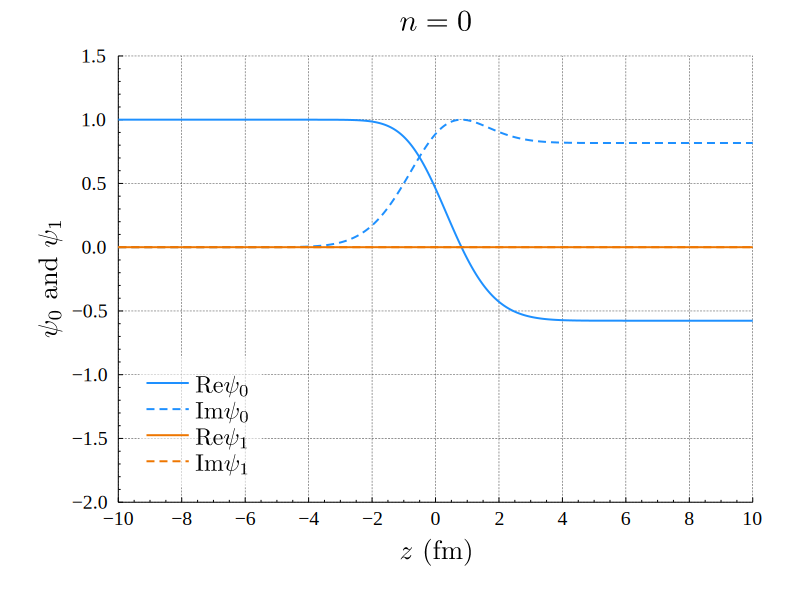

In [31]:
ψ₀ = A₀₀ ;
ψ₁ = zero(z) ;
n = 0 ;
plt=plotψ(z, ψ₀, ψ₁, title=L"n=%$n")
savefig("out/psi_n$n.svg")
display(plt)

次のセルを繰り返し実行することで反復ができる.
`CTRL` + `ENTER` を何回か押してみよう.

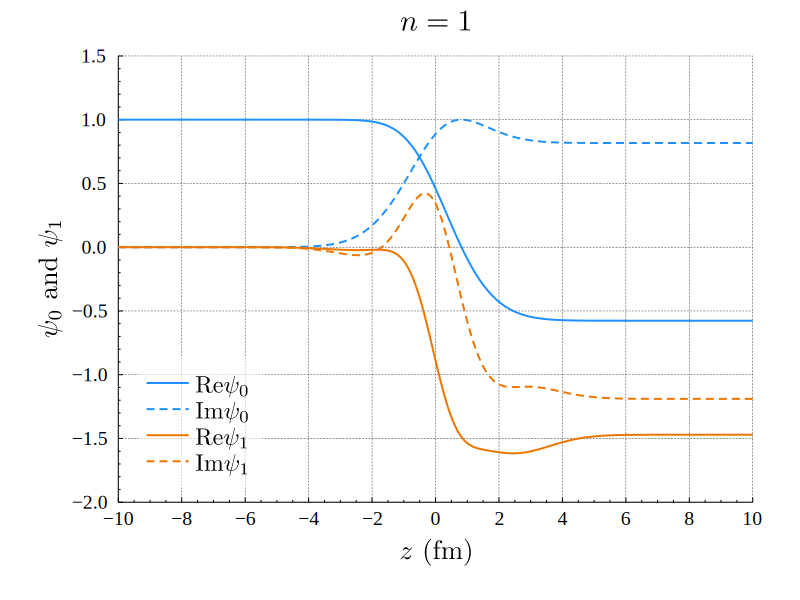

In [32]:
ψ₀, ψ₁ = Ô₀(z, ψ₁, A₀₀, B₀₀), Ô₁(z, ψ₀, A₁₁, B₁₁);
n += 1;
plt=plotψ(z, ψ₀, ψ₁, title=L"n=%$n")
savefig("out/psi_n$n.svg")
display(plt)

$n=10$ 程度で収束していることが見て取れる.

$\psi_0$, $\psi_1$の反復による変化を1枚のプロットに描画する.

$n=0,1,2,4,6,10$における$\psi_0(z, b=0)$, $\psi_1(z, b=0)$をプロットする.

In [33]:
function subplotψ(
        z, ψ₀, ψ₁;
        size=(400,300),
        title=nothing,
        legend=:bottomleft,
        drawxlabel=false,
        drawylabel=false,
        xformatter=:auto,
        yformatter=:auto,
    )
    leftmargin=0mm
    if drawylabel
        leftmargin=5mm
    end
    plt=plot(
        z,
        real(ψ₀),
        color=:dodgerblue,
        label=L"\mathrm{Re} \psi_0",
        xlims=(-10, 10),
        ylims=(-2, 1.5),
        xticks=-10:5:10,
        yticks=-2:0.5:1.5,
        xminorticks=5,
        yminorticks=5,
        topmargin=0mm,
        bottommargin=0mm,
        leftmargin=leftmargin,
        labelfontsize=16,
        tickfontsize=12,
        legendfontsize=14,
        legend=legend,
        size=size,
        xformatter=xformatter,
        yformatter=yformatter
    )
    plot!(
        z,
        imag(ψ₀),
        color=:dodgerblue,
        linestyle=:dash,
        label=L"\mathrm{Im} \psi_0",
    )
    plot!(
        z,
        real(ψ₁),
        color=:darkorange2,
        label=L"\mathrm{Re} \psi_1",
    )
    plot!(
        z,
        imag(ψ₁),
        color=:darkorange2,
        linestyle=:dash,
        label=L"\mathrm{Im} \psi_1",
    )
    if !isnothing(title)
        annotate!(-5, 1.3, text(title, 16))
    end
    if drawxlabel
        xlabel!(L"z \ (\mathrm{fm})")
    end
    if drawylabel
        ylabel!(L"\psi_0 \ \mathrm{and} \ \psi_1")
    end
    plt
end

subplotψ (generic function with 1 method)

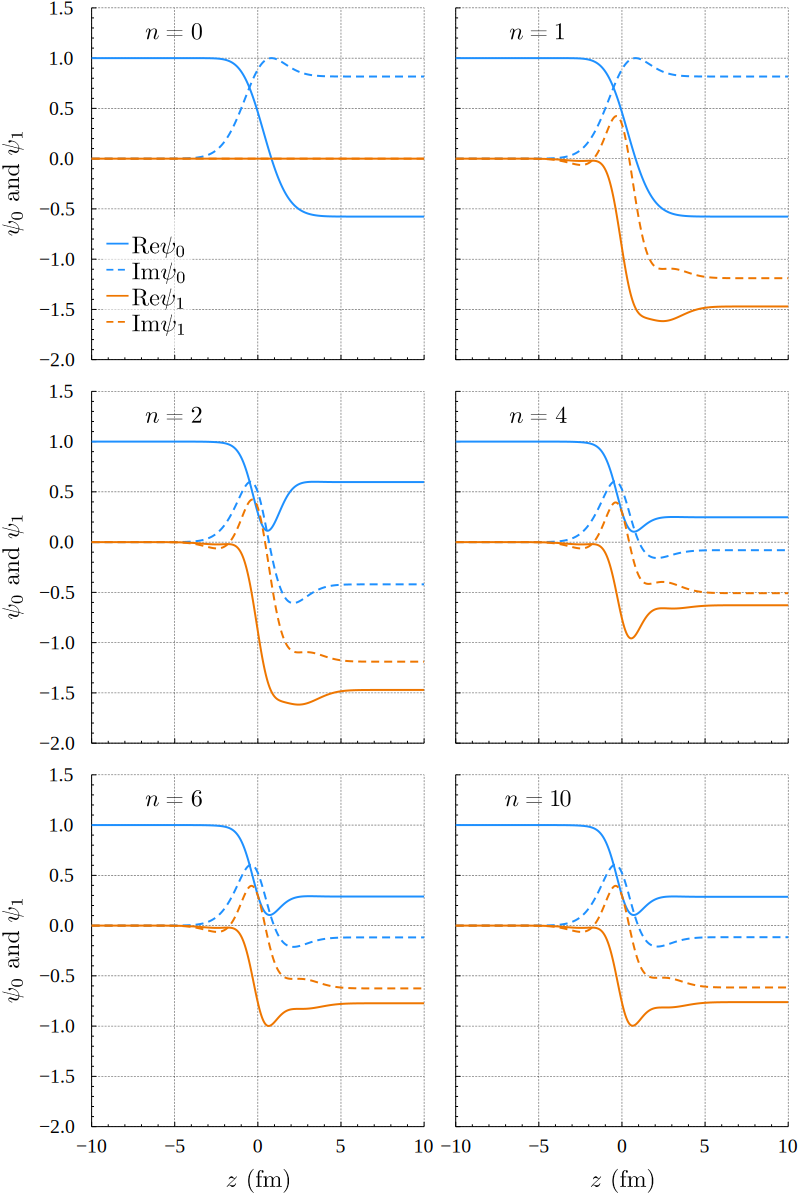

In [34]:
ns = [0,1,2,4,6,10]
drawxlabel = [false, false, false, false, true, true]
drawylabel = [true, false, true, false, true, false]
xformatter = [
    _->"", _->"", _->"", _->"", :auto, :auto
]
yformatter = [
    :auto, _->"", :auto, _->"", :auto, _->""
]
subplts = Vector{Plots.Plot}(undef, 6)

ψ₀ = A₀₀
ψ₁ = zero(z)

subplts[1]=subplotψ(
    z, ψ₀, ψ₁,
    title=L"n=0",
    drawxlabel=drawxlabel[1],
    drawylabel=drawylabel[1],
    xformatter=xformatter[1],
    yformatter=yformatter[1]
)

for n = 1:10
    ψ₀, ψ₁ = Ô₀(z, ψ₁, A₀₀, B₀₀), Ô₁(z, ψ₀, A₁₁, B₁₁)
    index = findfirst(x->x==n, ns)
    if !isnothing(index)
        subplts[index] = subplotψ(
            z, ψ₀, ψ₁,
            title=L"n=%$n",
            legend=false,
            drawxlabel=drawxlabel[index],
            drawylabel=drawylabel[index],
            xformatter=xformatter[index],
            yformatter=yformatter[index]
        )
    end
end
plt=plot(
    subplts...,
    size=(800,1200),
    layout = (3,2)
)
savefig("out/psi_ns.svg")
display(plt)

## 微分断面積を求める

計算過程は省略するが, 弾性チャネルへの遷移行列$T_0$は前方散乱近似を適用することで
$$
T_0
= \frac{i\hbar c \beta_0}{(2\pi)^2}
\int_{0}^{\infty}
    J_0(K_0 b \theta)
    \left[
        S_0^{\mathrm{EK}}(b) -1
    \right]
    b db
$$
となる. ここで $J_0$ は0次の第1種Bessel関数, $S_0^{\mathrm{EK}}(b)$はアイコナール$S$行列
$$
S_0^{\mathrm{EK}}(b) = \lim_{z\to\infty}\psi_0(z,b)
$$
である.
弾性散乱の微分断面積$\frac{d\sigma_0}{d\Omega}$は
$$
\begin{align}
\frac{d\sigma_0}{d\Omega}
&= \frac{(2\pi)^4 \mu^2}{\hbar^4}|T_0|^2 \\
&= K_0^2 \left|
    \int_{0}^{\infty}
        J_0(K_0 b \theta)
        \left[
            S_0^{\mathrm{EK}}(b) -1
        \right]
        b db
\right|^2
\end{align}
$$
となる.

非弾性チャネルへの遷移行列$T_1$は
$$
T_1 = \frac{i\hbar c \beta_1}{(2\pi)^2}
\sqrt{\frac{K_0}{K_1}}
\int_{0}^{\infty}
J_0(K_1 b \theta) S_{1}^{\mathrm{EK}}(b) bdb
$$
ここで, $S_{1}^{\mathrm{EK}}(b)$は
$$
S_{1}^{\mathrm{EK}}(b)
= \sqrt{\frac{K_0}{K_1}} \lim_{z\to\infty}\psi_1(z,b)
$$
である.
非弾性散乱の微分断面積$\frac{d\sigma_1}{d\Omega}$は
$$
\begin{align}
\frac{d\sigma_1}{d\Omega}
&= \frac{(2\pi)^4 \mu^2}{\hbar^4} \frac{K_1}{K_0} |T_1|^2 \\
&= K_1^2 \left|
\int_0^{\infty} J_0(K_1b\theta) S_{1}^{\mathrm{EK}}(b) bdb
\right|^2
\end{align}
$$
となる.

テキストの図7.4と図7.7は前方散乱近似:
$$
q
= 2 K \sin \frac{\theta}{2}
\approx K \theta
\tag{5.53}
\label{eq:small-angel-approx}
$$
を適用せずに計算した微分断面積:
$$
\begin{align}
\frac{d\sigma_0}{d\Omega}
&= \frac{(2\pi)^4 \mu^2}{\hbar^4}|T_0|^2 \\
&= K_0^2 \left|
    \int_{0}^{\infty}
        J_0 \left(
            2 K_0 b \sin \frac{\theta}{2}
        \right)
        \left[
            S_0^{\mathrm{EK}}(b) -1
        \right]
        b db
\right|^2
\end{align}
$$
$$
\begin{align}
\frac{d\sigma_1}{d\Omega}
&= \frac{(2\pi)^4 \mu^2}{\hbar^4} \frac{K_1}{K_0} |T_1|^2 \\
&= K_1^2 \left|
    \int_0^{\infty}
        J_0\left(
            2 K_1 b \sin \frac{\theta}{2}
        \right)
        S_{1}^{\mathrm{EK}}(b)
    bdb
\right|^2
\end{align}
$$
のプロットのようなので, これも計算する.

In [35]:
bₘₐₓ = 10.0 ;
Δb = 0.05 ;
b = collect(0.0:Δb:bₘₐₓ) # impact parameters; fm;
θ = range(0.0, 2π/3, length=121) # scattering angle; rad;
θ = collect(θ) ;

In [36]:
function findψ(z::Vector, b::Number; N=10, ψ₀⁰=nothing, ψ₁⁰=nothing)
    A₀₀, A₁₁, B₀₀, B₁₁ = constpart(z, b)
    if isnothing(ψ₀⁰)
        ψ₀ = A₀₀
    else
        ψ₀ = ψ₀⁰
    end
    if isnothing(ψ₁⁰)
        ψ₁ = zero(z)
    else
        ψ₁ = ψ₁⁰
    end
    for n in 1:N
        ψ₀, ψ₁ = Ô₀(z, ψ₁, A₀₀, B₀₀), Ô₁(z, ψ₀, A₁₁, B₁₁)
    end
    ψ₀, ψ₁
end

findψ (generic function with 1 method)

アイコナール$S$行列 $S_0^{\mathrm{EK}}$, $S_1^{\mathrm{EK}}$を求める関数を定義する.
普通にやると時間がかかるので, 並列化する.

`Base.Threads` の `@threads` を利用するが, `enumerate` に対応していない
(see [#40704](https://github.com/JuliaLang/julia/issues/40704)).
`enumerate` を使う場合は次のように, `collect()` を使う必要がある.

```julia
@threads for (i, bᵢ) in collect(enumerate(b))
    S₀ᴱᴷ[i] = eikonalS(bᵢ, z=z, N=N)
end
```

ただ, そもそもわざわざ `enumerate` を使わずとも次のように計算できるので問題にはならない.

```julia
@threads for i=1:length(b)
    S₀ᴱᴷ[i] = eikonalS(b[i], z=z, N=N)
end
```

(最初, `enumerate()` を使って書いてErrorが出たのでメモ)

In [37]:
function eikonalS₀(
        b::Number;
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        ψ₀⁰=nothing, ψ₁⁰=nothing
    )
    ψ₀, ψ₁ = findψ(z, b, N=N, ψ₀⁰=ψ₀⁰, ψ₁⁰=ψ₁⁰)
    ψ₀[end]
end

function eikonalS₀(
        b::Vector;
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        ψ₀⁰=nothing,
        ψ₁⁰=nothing
    )
    S₀ᴱᴷ = Vector{Complex}(undef, length(b))
    @threads for i = 1:length(b)
        S₀ᴱᴷ[i] = eikonalS₀(b[i], z=z, N=N, ψ₀⁰=ψ₀⁰, ψ₁⁰=ψ₁⁰)
    end
    S₀ᴱᴷ
end

function eikonalS₁(
        b::Number;
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        ψ₀⁰=nothing,
        ψ₁⁰=nothing
    )
    ψ₀, ψ₁ = findψ(z, b, N=N, ψ₀⁰=ψ₀⁰, ψ₁⁰=ψ₁⁰)
    √(K₁/K₀) * ψ₁[end]
end

function eikonalS₁(
        b::Vector;
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        ψ₀⁰=nothing,
        ψ₁⁰=nothing
    )
    S₁ᴱᴷ = Vector{Complex}(undef, length(b))
    @threads for i = 1:length(b)
        S₁ᴱᴷ[i] = eikonalS₁(b[i], z=z, N=N, ψ₀⁰=ψ₀⁰, ψ₁⁰=ψ₁⁰)
    end
    S₁ᴱᴷ
end

function eikonalS(
        b::Number;
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        ψ₀⁰=nothing,
        ψ₁⁰=nothing
    )
    ψ₀, ψ₁ = findψ(z, b, N=N, ψ₀⁰=ψ₀⁰, ψ₁⁰=ψ₁⁰)
    ψ₀[end], √(K₁/K₀) * ψ₁[end]
end

function eikonalS(
        b::Vector;
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        ψ₀⁰=nothing,
        ψ₁⁰=nothing
    )
    S₀ᴱᴷ = Vector{Complex}(undef, length(b))
    S₁ᴱᴷ = Vector{Complex}(undef, length(b))
    @threads for i = 1:length(b)
        S₀ᴱᴷ[i], S₁ᴱᴷ[i] = eikonalS(b[i], z=z, N=N, ψ₀⁰=ψ₀⁰, ψ₁⁰=ψ₁⁰)
    end
    S₀ᴱᴷ, S₁ᴱᴷ
end

eikonalS (generic function with 2 methods)

In [38]:
function calcdσ₀╱dΩ(
        θ::Number;
        b::Vector=collect(0.0:Δb:bₘₐₓ),
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        smallangleapprox=true
    )
    S₀ᴱᴷ = eikonalS₀(b, z=z, N=N)
    if smallangleapprox
        return K₀² * abs2(∫db(besselj0.(K₀.*b.*θ) .* (S₀ᴱᴷ .- 1) .* b, b))
    else
        return K₀² * abs2(∫db(besselj0.(2K₀.*b.*sin(θ/2)) .* (S₀ᴱᴷ .- 1) .* b, b))
    end
end

function calcdσ₀╱dΩ(
        θ::Vector;
        b::Vector=collect(0.0:Δb:bₘₐₓ),
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        smallangleapprox=true
    )
    dσ₀ = Vector{Real}(undef, length(θ))
    S₀ᴱᴷ = eikonalS₀(b, z=z, N=N)
    if smallangleapprox
        @threads for i = 1:length(θ)
            dσ₀[i] = K₀² * abs2(∫db(besselj0.(K₀.*b.*θ[i]) .* (S₀ᴱᴷ .- 1) .* b, b))
        end
    else
        @threads for i = 1:length(θ)
            dσ₀[i] = K₀² * abs2(∫db(besselj0.(2K₀.*b.*sin(θ[i]/2)) .* (S₀ᴱᴷ .- 1) .* b, b))
        end
    end
    dσ₀
end

function calcdσ₁╱dΩ(
        θ::Number;
        b::Vector=collect(0.0:Δb:bₘₐₓ),
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        smallangleapprox=true
    )
    S₁ᴱᴷ = eikonalS₁(b, z=z, N=N)
    if smallangleapprox
        return K₁² * abs2(∫db(besselj0.(K₁.*b.*θ) .* S₁ᴱᴷ .* b, b))
    else
        return K₁² * abs2(∫db(besselj0.(2K₁.*b.*sin(θ/2)) .* S₁ᴱᴷ .* b, b))
    end
end

function calcdσ₁╱dΩ(
        θ::Vector;
        b::Vector=collect(0.0:Δb:bₘₐₓ),
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        smallangleapprox=true
    )
    dσ₁ = Vector{Real}(undef, length(θ))
    S₁ᴱᴷ = eikonalS₁(b, z=z, N=N)
    if smallangleapprox
        @threads for i = 1:length(θ)
            dσ₁[i] = K₁² * abs2(∫db(besselj0.(K₁.*b.*θ[i]) .* S₁ᴱᴷ .* b, b))
        end
    else
        @threads for i = 1:length(θ)
            dσ₁[i] = K₁² * abs2(∫db(besselj0.(2K₁.*b.*sin(θ[i]/2)) .* S₁ᴱᴷ .* b, b))
        end
    end
    dσ₁
end

function calcdσ╱dΩ(
        θ::Number;
        b::Vector=collect(0.0:Δb:bₘₐₓ),
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        smallangleapprox=true
    )
    S₀ᴱᴷ, S₁ᴱᴷ = eikonalS(b, z=z, N=N)
    if smallangleapprox
        dσ₀ = K₀² * abs2(∫db(besselj0.(K₀.*b.*θ) .* (S₀ᴱᴷ .- 1) .* b, b))
        dσ₁ = K₁² * abs2(∫db(besselj0.(K₁.*b.*θ) .* S₁ᴱᴷ .* b, b))
    else
        dσ₀ = K₀² * abs2(∫db(besselj0.(2K₀.*b.*sin(θ/2)) .* (S₀ᴱᴷ .- 1) .* b, b))
        dσ₁ = K₁² * abs2(∫db(besselj0.(2K₁.*b.*sin(θ/2)) .* S₁ᴱᴷ .* b, b))
    end
    dσ₀, dσ₁
end

function calcdσ╱dΩ(
        θ::Vector;
        b::Vector=collect(0.0:Δb:bₘₐₓ),
        z::Vector=collect(zₘᵢₙ:Δz:zₘₐₓ),
        N=10,
        smallangleapprox=true
    )
    dσ₀ = Vector{Real}(undef, length(θ))
    dσ₁ = Vector{Real}(undef, length(θ))
    S₀ᴱᴷ, S₁ᴱᴷ = eikonalS(b, z=z, N=N)
    if smallangleapprox
        @threads for i = 1:length(θ)
            dσ₀[i] = K₀² * abs2(∫db(besselj0.(K₀.*b.*θ[i]) .* (S₀ᴱᴷ .- 1) .* b, b))
            dσ₁[i] = K₁² * abs2(∫db(besselj0.(K₁.*b.*θ[i]) .* S₁ᴱᴷ .* b, b))
        end
    else
        @threads for i = 1:length(θ)
            dσ₀[i] = K₀² * abs2(∫db(besselj0.(2K₀.*b.*sin(θ[i]/2)) .* (S₀ᴱᴷ .- 1) .* b, b))
            dσ₁[i] = K₁² * abs2(∫db(besselj0.(2K₁.*b.*sin(θ[i]/2)) .* S₁ᴱᴷ .* b, b))
        end
    end
    dσ₀, dσ₁
end

calcdσ╱dΩ (generic function with 2 methods)

弾性散乱微分断面積$d\sigma_0/d\Omega$, 非弾性散乱微分断面積$d\sigma_1/d\Omega$を計算する.

微分断面積の計算は並列スレッド数を4に設定したMacBook Pro (13-inch, 2019, Quad-Core Intel Core i5)で20秒くらいかかったので注意.

`Δz = 0.1` のときはシングルスレッドでも5~10秒程度で計算は終わる.

In [39]:
@time dσ₀╱dΩ, dσ₁╱dΩ = calcdσ╱dΩ(θ);

 19.514297 seconds (2.05 G allocations: 32.478 GiB, 30.38% gc time, 1.87% compilation time)


In [40]:
@time dσ₀⁽¹⁾╱dΩ, dσ₁⁽¹⁾╱dΩ = calcdσ╱dΩ(θ, N=1);

 25.153505 seconds (2.05 G allocations: 32.047 GiB, 29.63% gc time, 0.04% compilation time)


今求めた微分断面積の単位は$\mathrm{fm^2/sr}$である.これを$\mathrm{mb/sr}$に変換する.
($1\mathrm{barn} = 100\mathrm{fm^2}$)

In [41]:
dσ₀╱dΩ .*= 10 ;
dσ₁╱dΩ .*= 10 ;
dσ₀⁽¹⁾╱dΩ .*= 10 ;
dσ₁⁽¹⁾╱dΩ .*= 10 ;

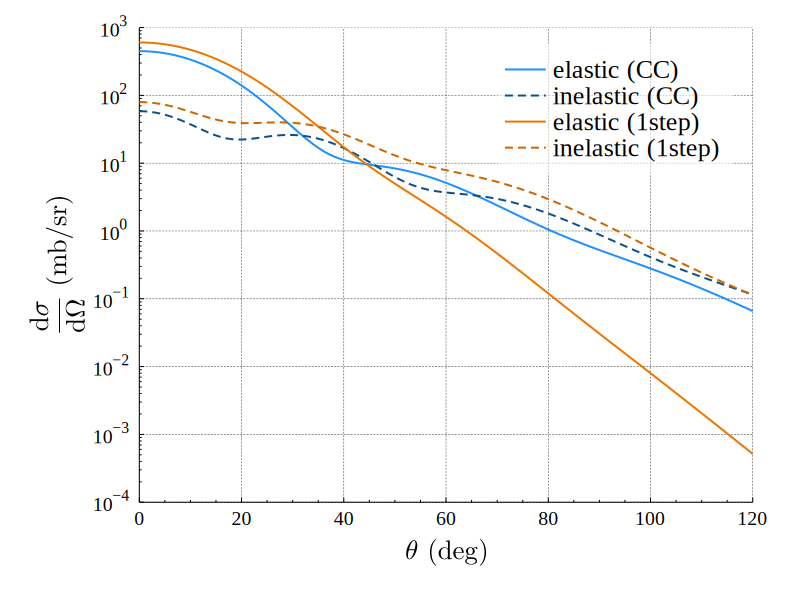

In [42]:
plt=plot(
    rad2deg.(θ),
    dσ₀╱dΩ,
    color=:dodgerblue,
    label="elastic (CC)",
    yaxis=:log,
    xlims=(0, 120),
    ylims=(1e-4, 1e3),
    xticks=0:20:120,
    yticks=exp10.(-4:1:3),
    xminorticks=4,
    yminorticks=9,
    top_margin=5mm,
    margin=10mm,
    legend=:topright,
)
plot!(
    rad2deg.(θ),
    dσ₁╱dΩ,
    color=:dodgerblue4,
    linestyle=:dash,
    label="inelastic (CC)",
)
plot!(
    rad2deg.(θ),
    dσ₀⁽¹⁾╱dΩ,
    color=:darkorange2,
    label="elastic (1step)",
)
plot!(
    rad2deg.(θ),
    dσ₁⁽¹⁾╱dΩ,
    color=:darkorange3,
    linestyle=:dash,
    label="inelastic (1step)",
)
xlabel!(L"\theta \ (\mathrm{deg})")
ylabel!(L"\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega} \ (\mathrm{mb/sr})")
savefig("out/diff-cross-section.svg")
display(plt)

前方散乱近似を使わなかった場合の微分断面積も計算する.

In [43]:
@time dσ₀╱dΩₛᵢₙ, dσ₁╱dΩₛᵢₙ = calcdσ╱dΩ(θ, smallangleapprox=false);

 18.836000 seconds (2.05 G allocations: 32.377 GiB, 31.64% gc time, 0.52% compilation time)


In [44]:
@time dσ₀⁽¹⁾╱dΩₛᵢₙ, dσ₁⁽¹⁾╱dΩₛᵢₙ = calcdσ╱dΩ(θ, N=1, smallangleapprox=false);

 21.921284 seconds (2.05 G allocations: 32.047 GiB, 31.20% gc time, 0.06% compilation time)


$\mathrm{fm^2/sr} \to \mathrm{mb/sr} $

In [45]:
dσ₀╱dΩₛᵢₙ .*= 10 ;
dσ₁╱dΩₛᵢₙ .*= 10 ;
dσ₀⁽¹⁾╱dΩₛᵢₙ .*= 10 ;
dσ₁⁽¹⁾╱dΩₛᵢₙ .*= 10 ;

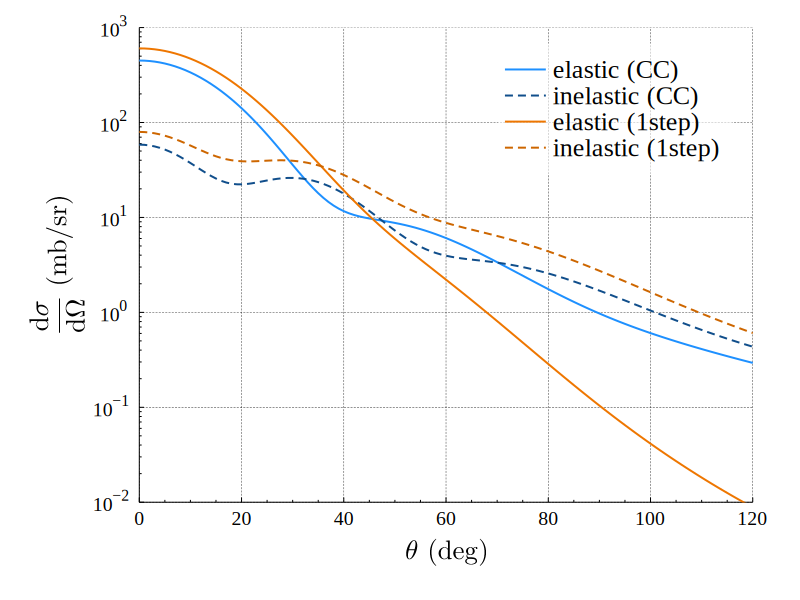

In [46]:
plt=plot(
    rad2deg.(θ),
    dσ₀╱dΩₛᵢₙ,
    color=:dodgerblue,
    label="elastic (CC)",
    yaxis=:log,
    xlims=(0, 120),
    ylims=(1e-2, 1e3),
    xticks=0:20:120,
    yticks=exp10.(-2:1:3),
    xminorticks=4,
    yminorticks=9,
    top_margin=5mm,
    margin=10mm,
    legend=:topright,
)
plot!(
    rad2deg.(θ),
    dσ₁╱dΩₛᵢₙ,
    color=:dodgerblue4,
    linestyle=:dash,
    label="inelastic (CC)",
)
plot!(
    rad2deg.(θ),
    dσ₀⁽¹⁾╱dΩₛᵢₙ,
    color=:darkorange2,
    label="elastic (1step)",
)
plot!(
    rad2deg.(θ),
    dσ₁⁽¹⁾╱dΩₛᵢₙ,
    color=:darkorange3,
    linestyle=:dash,
    label="inelastic (1step)",
)
xlabel!(L"\theta \ (\mathrm{deg})")
ylabel!(L"\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega} \ (\mathrm{mb/sr})")
savefig("out/diff-cross-section-wo-smallangleapprox.svg")
display(plt)

散乱角$\theta$, 微分断面積$d\sigma/d\Omega$を `tsv` フォーマットでFileに書き出す.

In [47]:
open("out/diff-cross-section.tsv", "w") do fout
    writedlm(
        fout,
        [rad2deg.(θ) dσ₀╱dΩ dσ₁╱dΩ dσ₀⁽¹⁾╱dΩ dσ₁⁽¹⁾╱dΩ]
    )
end

In [48]:
open("out/diff-cross-section-wo-smallangleapprox.tsv", "w") do fout
    writedlm(
        fout,
        [rad2deg.(θ) dσ₀╱dΩₛᵢₙ dσ₁╱dΩₛᵢₙ dσ₀⁽¹⁾╱dΩₛᵢₙ dσ₁⁽¹⁾╱dΩₛᵢₙ]
    )
end

### 結合ポテンシャル$V_{10}$の強さを半分にしたときの微分断面積

結合ポテンシャル$V_{10}=V_{01}$の強さを半分にして弾性散乱微分断面積$d\sigma_0/d\Omega$, 非弾性散乱微分断面積$d\sigma_1/d\Omega$を計算する.

In [49]:
v̄₀ = OffsetArray([
    -250   -250/2
    -250/2 -250
], 0:1, 0:1) # MeV⋅fm³ ;

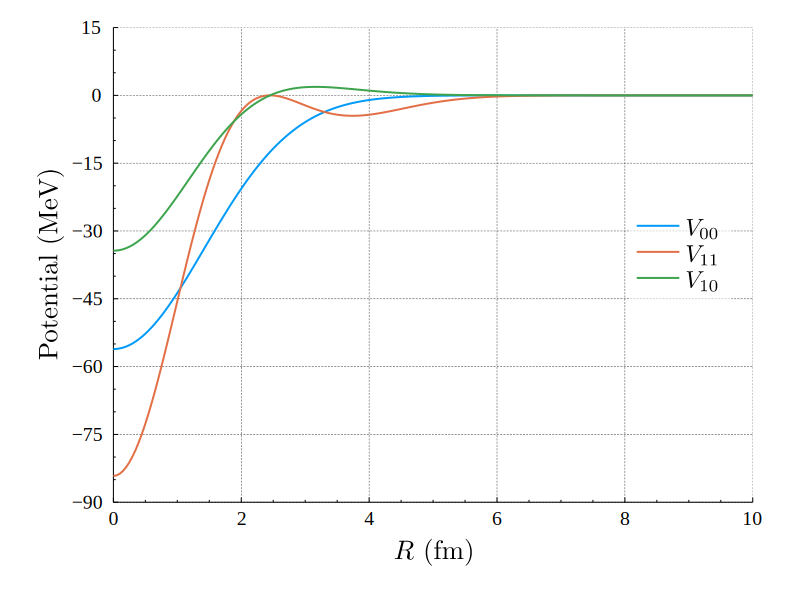

In [50]:
R = 0:0.05:10
plt=plot(
    R, V₀₀.(R),
    label=L"V_{00}",
    xlims=(0, 10),
    ylims=(-90,15),
    xticks=0:2:10,
    yticks=-90:15:15,
    xminorticks=4,
    yminorticks=3,
    top_margin=5mm,
    margin=10mm,
    legend=:right,
)
plot!(
    R, V₁₁.(R),
    label=L"V_{11}",
)
plot!(
    R, V₁₀.(R),
    label=L"V_{10}",
)
xlabel!(
    L"R \ \mathrm{(fm)}"
)
ylabel!(
    L"\mathrm{Potential \ (MeV)}"
)
savefig("out/potential-weaken-offdiagV.svg")
display(plt)

In [51]:
@time dσ₀╱dΩₘ, dσ₁╱dΩₘ = calcdσ╱dΩ(θ);

 20.839798 seconds (2.05 G allocations: 32.371 GiB, 27.70% gc time)


In [52]:
@time dσ₀⁽¹⁾╱dΩₘ, dσ₁⁽¹⁾╱dΩₘ = calcdσ╱dΩ(θ, N=1);

 19.758867 seconds (2.05 G allocations: 32.046 GiB, 28.47% gc time)


$\mathrm{fm^2/sr} \to \mathrm{mb/sr}$

In [53]:
dσ₀╱dΩₘ .*= 10 ;
dσ₁╱dΩₘ .*= 10 ;
dσ₀⁽¹⁾╱dΩₘ .*= 10 ;
dσ₁⁽¹⁾╱dΩₘ .*= 10 ;

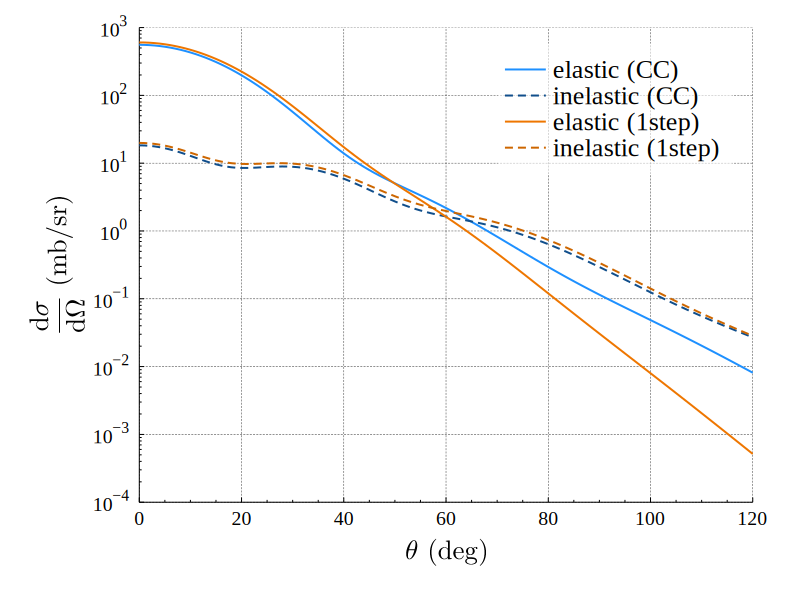

In [54]:
plt=plot(
    rad2deg.(θ),
    dσ₀╱dΩₘ,
    color=:dodgerblue,
    label="elastic (CC)",
    yaxis=:log,
    xlims=(0, 120),
    ylims=(1e-4, 1e3),
    xticks=0:20:120,
    yticks=exp10.(-4:1:3),
    xminorticks=4,
    yminorticks=9,
    top_margin=5mm,
    margin=10mm,
    legend=:topright,
)
plot!(
    rad2deg.(θ),
    dσ₁╱dΩₘ,
    color=:dodgerblue4,
    linestyle=:dash,
    label="inelastic (CC)",
)
plot!(
    rad2deg.(θ),
    dσ₀⁽¹⁾╱dΩₘ,
    color=:darkorange2,
    label="elastic (1step)",
)
plot!(
    rad2deg.(θ),
    dσ₁⁽¹⁾╱dΩₘ,
    color=:darkorange3,
    linestyle=:dash,
    label="inelastic (1step)",
)
xlabel!(L"\theta \ (\mathrm{deg})")
ylabel!(L"\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega} \ (\mathrm{mb/sr})")
savefig("out/diff-cross-section-weaken-offdiagV.svg")
display(plt)

前方散乱近似を使わなかった場合の微分断面積も計算する.

In [55]:
@time dσ₀╱dΩₘₛᵢₙ, dσ₁╱dΩₘₛᵢₙ = calcdσ╱dΩ(θ, smallangleapprox=false);

 20.082607 seconds (2.05 G allocations: 32.371 GiB, 28.29% gc time)


In [56]:
@time dσ₀⁽¹⁾╱dΩₘₛᵢₙ, dσ₁⁽¹⁾╱dΩₘₛᵢₙ = calcdσ╱dΩ(θ, N=1, smallangleapprox=false);

 19.953299 seconds (2.05 G allocations: 32.046 GiB, 28.78% gc time)


$\mathrm{fm^2/sr} \to \mathrm{mb/sr}$

In [57]:
dσ₀╱dΩₘₛᵢₙ .*= 10 ;
dσ₁╱dΩₘₛᵢₙ .*= 10 ;
dσ₀⁽¹⁾╱dΩₘₛᵢₙ .*= 10 ;
dσ₁⁽¹⁾╱dΩₘₛᵢₙ .*= 10 ;

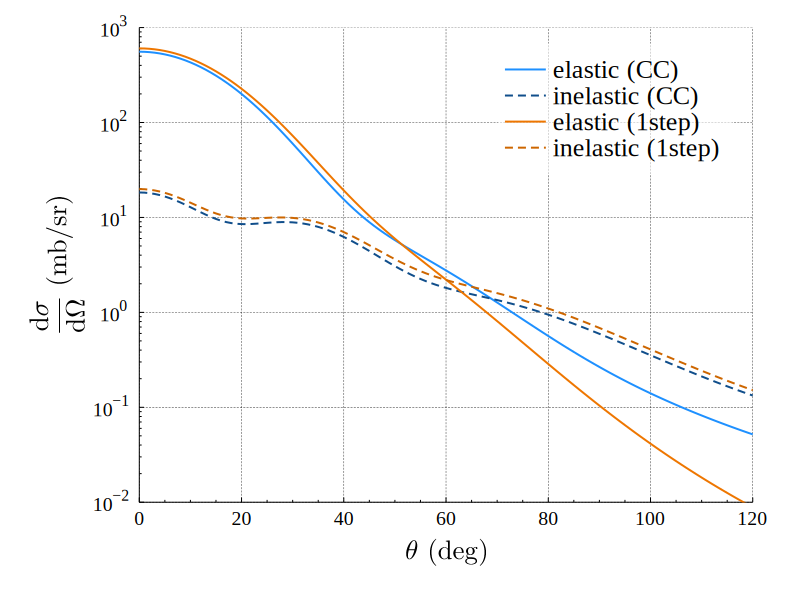

In [58]:
plt=plot(
    rad2deg.(θ),
    dσ₀╱dΩₘₛᵢₙ,
    color=:dodgerblue,
    label="elastic (CC)",
    yaxis=:log,
    xlims=(0, 120),
    ylims=(1e-2, 1e3),
    xticks=0:20:120,
    yticks=exp10.(-2:1:3),
    xminorticks=4,
    yminorticks=9,
    top_margin=5mm,
    margin=10mm,
    legend=:topright,
)
plot!(
    rad2deg.(θ),
    dσ₁╱dΩₘₛᵢₙ,
    color=:dodgerblue4,
    linestyle=:dash,
    label="inelastic (CC)",
)
plot!(
    rad2deg.(θ),
    dσ₀⁽¹⁾╱dΩₘₛᵢₙ,
    color=:darkorange2,
    label="elastic (1step)",
)
plot!(
    rad2deg.(θ),
    dσ₁⁽¹⁾╱dΩₘₛᵢₙ,
    color=:darkorange3,
    linestyle=:dash,
    label="inelastic (1step)",
)
xlabel!(L"\theta \ (\mathrm{deg})")
ylabel!(L"\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega} \ (\mathrm{mb/sr})")
savefig("out/diff-cross-section-weaken-offdiagV-wo-smallangleapprox.svg")
display(plt)

結合ポテンシャル$V_{10}=V_{01}$の強さを半分にしたときの微分断面積$d\sigma/d\Omega$を `tsv` フォーマットでFileに書き出す.

In [59]:
open("out/diff-cross-section-weaken-offdiagV.tsv", "w") do fout
    writedlm(
        fout,
        [rad2deg.(θ) dσ₀╱dΩₘ dσ₁╱dΩₘ dσ₀⁽¹⁾╱dΩₘ dσ₁⁽¹⁾╱dΩₘ]
    )
end

In [60]:
open("out/diff-cross-section-weaken-offdiagV-wo-smallangleapprox.tsv", "w") do fout
    writedlm(
        fout,
        [rad2deg.(θ) dσ₀╱dΩₘₛᵢₙ dσ₁╱dΩₘₛᵢₙ dσ₀⁽¹⁾╱dΩₘₛᵢₙ dσ₁⁽¹⁾╱dΩₘₛᵢₙ]
    )
end

$V_{c^{\prime}c}$の強さ$\bar{v}_0$を元の設定に戻す.

In [61]:
v̄₀ = OffsetArray([
    -250.0 -250.0
    -250.0 -250.0
], 0:1, 0:1) # MeV⋅fm³ ;

## $S_0^{\mathrm{EK}}$, $S_1^{\mathrm{EK}}$のプロット

$S$行列の計算も並列スレッド数を4に設定したMacBook Pro (13-inch, 2019, Quad-Core Intel Core i5)で20秒くらいかかったので注意.
`Δz = 0.1` のときはシングルスレッドでも5~10秒程度で計算は終わる.

In [62]:
@time S₀ᴱᴷ, S₁ᴱᴷ = eikonalS(b);

 17.966994 seconds (2.05 G allocations: 32.368 GiB, 29.19% gc time, 0.20% compilation time)


In [63]:
@time S₀ᴱᴷ⁽¹⁾, S₁ᴱᴷ⁽¹⁾ = eikonalS(b, N=1);

 20.705544 seconds (2.05 G allocations: 32.041 GiB, 28.49% gc time, 0.04% compilation time)


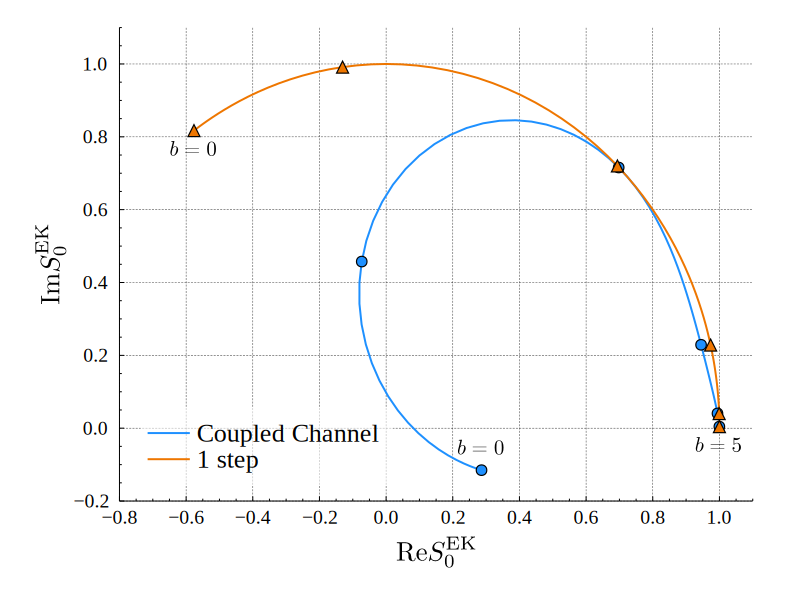

In [64]:
plt=plot(
    real(S₀ᴱᴷ),
    imag(S₀ᴱᴷ),
    color=:dodgerblue,
    label="Coupled Channel",
    xlims=(-0.8, 1.1),
    ylims=(-0.2, 1.1),
    xticks=-0.8:0.2:1.1,
    yticks=-0.2:0.2:1.1,
    xminorticks=4,
    yminorticks=4,
    top_margin=5mm,
    margin=10mm,
    legend=:bottomleft,
)
plot!(
    real(S₀ᴱᴷ⁽¹⁾),
    imag(S₀ᴱᴷ⁽¹⁾),
    color=:darkorange2,
    label="1 step",
)
plot!(
    real(S₀ᴱᴷ[1:Int(round(length(b)/bₘₐₓ)):length(b)÷2+1]),
    imag(S₀ᴱᴷ[1:Int(round(length(b)/bₘₐₓ)):length(b)÷2+1]),
    seriestype=:scatter,
    color=:dodgerblue,
    markersize=6,
    markershape=:circle,
    label=nothing,
)
plot!(
    real(S₀ᴱᴷ⁽¹⁾[1:Int(round(length(b)/bₘₐₓ)):length(b)÷2+1]),
    imag(S₀ᴱᴷ⁽¹⁾[1:Int(round(length(b)/bₘₐₓ)):length(b)÷2+1]),
    seriestype=:scatter,
    markersize=6,
    markershape=:utriangle,
    color=:darkorange2,
    label= nothing,
)
annotate!(
    real(S₀ᴱᴷ[1]),
    imag(S₀ᴱᴷ[1])+0.04,
    L"b=0",
    :bottom
)
annotate!(
    real(S₀ᴱᴷ⁽¹⁾[1]),
    imag(S₀ᴱᴷ⁽¹⁾[1])-0.01,
    L"b=0",
    :top
)
annotate!(
    real(S₀ᴱᴷ[length(b)÷2+1]),
    imag(S₀ᴱᴷ[length(b)÷2+1])-0.01,
    L"b=5",
    :top
)
xlabel!(L"\mathrm{Re} S_0^{\mathrm{EK}}")
ylabel!(L"\mathrm{Im} S_0^{\mathrm{EK}}")
savefig("out/S0EK.svg")
display(plt)

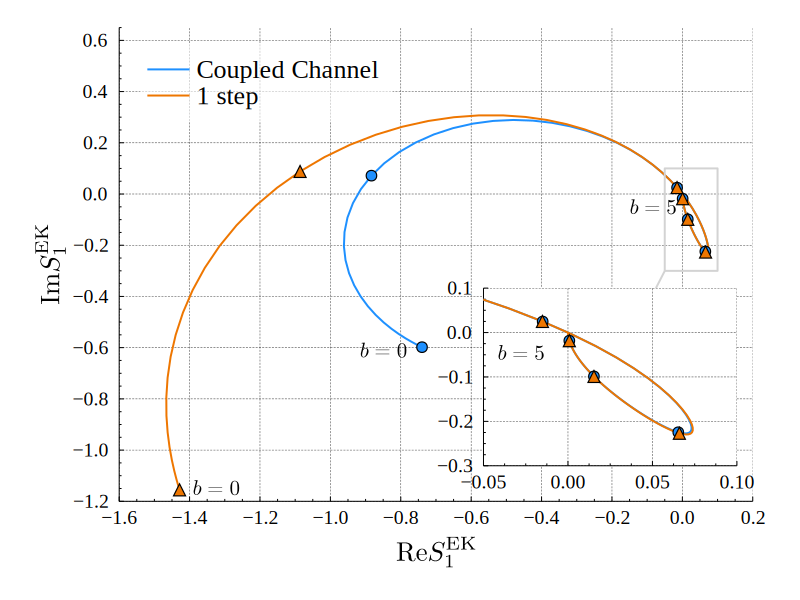

In [65]:
plt=plot(
    real(S₁ᴱᴷ),
    imag(S₁ᴱᴷ),
    color=:dodgerblue,
    label="Coupled Channel",
    xlims=(-1.6, 0.2),
    ylims=(-1.2, 0.65),
    xticks=-1.6:0.2:0.2,
    yticks=-1.2:0.2:0.65,
    xminorticks=4,
    yminorticks=4,
    top_margin=5mm,
    margin=10mm,
    legend=:topleft,
)
plot!(
    real(S₁ᴱᴷ⁽¹⁾),
    imag(S₁ᴱᴷ⁽¹⁾),
    color=:darkorange2,
    label="1 step",
)
plot!(
    real(S₁ᴱᴷ[1:Int(round(length(b)/bₘₐₓ)):length(b)÷2+1]),
    imag(S₁ᴱᴷ[1:Int(round(length(b)/bₘₐₓ)):length(b)÷2+1]),
    seriestype=:scatter,
    markersize=6,
    markershape=:circle,
    color=:dodgerblue,
    label=nothing,
)
plot!(
    real(S₁ᴱᴷ⁽¹⁾[1:Int(round(length(b)/bₘₐₓ)):length(b)÷2+1]),
    imag(S₁ᴱᴷ⁽¹⁾[1:Int(round(length(b)/bₘₐₓ)):length(b)÷2+1]),
    seriestype=:scatter,
    markersize=6,
    markershape=:utriangle,
    color=:darkorange2,
    label= nothing,
)
annotate!(
    real(S₁ᴱᴷ[1])-0.04,
    imag(S₁ᴱᴷ[1]),
    L"b=0",
    :right
)
annotate!(
    real(S₁ᴱᴷ⁽¹⁾[1])+0.04,
    imag(S₁ᴱᴷ⁽¹⁾[1])+0.02,
    L"b=0",
    :left
)
xlabel!(L"\mathrm{Re} S_1^{\mathrm{EK}}")
ylabel!(L"\mathrm{Im} S_1^{\mathrm{EK}}")
lens!(
    [-0.05, 0.1],
    [-0.3, 0.1],
    inset = (1, bbox(0.575, 0.55, 0.4, 0.375)),
    grid=true,
    gridstyle=:dash,
    gridalpha=0.8,
    xminorticks=4,
    yminorticks=4,
)
annotate!(
    real(S₁ᴱᴷ[length(b)÷2+1])-0.014,
    imag(S₁ᴱᴷ[length(b)÷2+1])-0.02,
    L"b=5",
    :right
)
savefig("out/S1EK.svg")
display(plt)

## $\psi_0(z,b=0)$の偏角

In [66]:
ψ₀, ψ₁ = findψ(z, 0);
ψ₀⁽¹⁾, ψ₁⁽¹⁾ = findψ(z, 0, N=1);

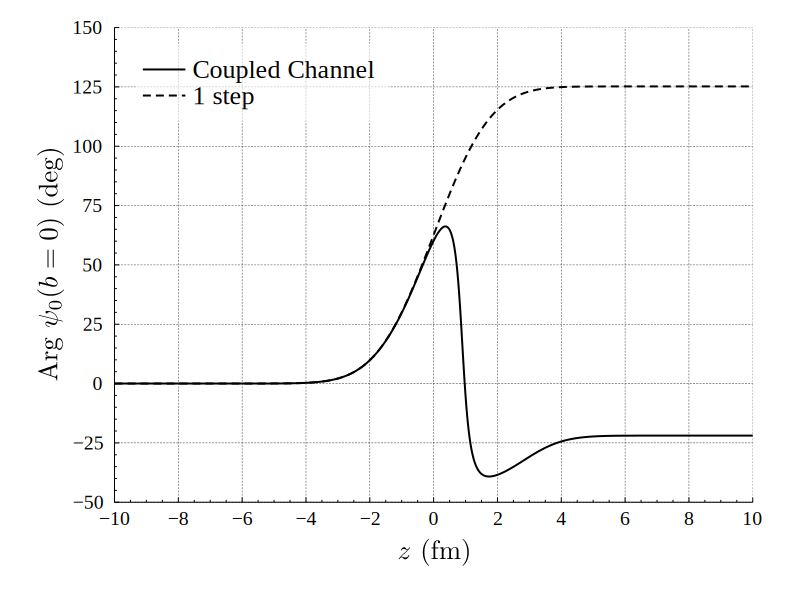

In [67]:
plt=plot(
    z,
    rad2deg.(angle.(ψ₀)),
    label="Coupled Channel",
    color=:black,
    xlims=(-10, 10),
    ylims=(-50, 150),
    xticks=-10:2:10,
    yticks=-50:25:150,
    xminorticks=4,
    yminorticks=5,
    top_margin=5mm,
    margin=10mm,
    legend=:topleft,
)
plot!(
    z,
    rad2deg.(angle.(ψ₀⁽¹⁾)),
    label="1 step",
    color=:black,
    linestyle=:dash
)
xlabel!(L"z \ (\mathrm{fm})")
ylabel!(L"\mathrm{Arg} \ \psi_0(b=0) \ (\mathrm{deg})")
savefig("out/Arg-psi0b0.svg")
display(plt)

## 流束の保存と$S$行列のユニタリティ
入射流束は
$$
j_{\mathrm{in}}
= \frac{
    \hbar K_0
}{
    (2\pi)^3\mu
}
$$
弾性チャネル, 非弾性チャネルの放出流束は
$$
\begin{align}
j_{0\mathrm{out}} (b)
&= \frac{
    \hbar K_0
}{
    (2\pi)^3\mu
} \left|
    S_{0}^{\mathrm{EK}}(b)
\right|^2 \\
j_{1\mathrm{out}} (b)
&= \frac{
    \hbar K_1
}{
    (2\pi)^3\mu
} \frac{K_0}{K_1} \left|
    S_{1}^{\mathrm{EK}}(b)
\right|^2
\end{align}
$$
である.
流束の保存を考えると,
$$
j_{\mathrm{in}}
= j_{0\mathrm{out}}(b) + j_{1\mathrm{out}}(b)
$$
$$
\therefore
\left| S_{0}^{\mathrm{EK}}(b) \right|^2
+ \left| S_{1}^{\mathrm{EK}}(b) \right|^2
= 1
$$
を得る.

1次摂動の計算結果は一般にユニタリティを満たさない.
実際, 今の場合, $\psi_1^{(0)} = 0$に注意すると, テキストの式(7.36)は
$$
\begin{align}
\psi_0(z,b)
= \exp\left[
    \frac{1}{i \hbar v_0}
    \int_{-\infty}^{z}
        V_{00}(z^{\prime}, b)
    d z^{\prime}
\right]
\end{align}
$$
となるから,
$$
\left| S_0^{\mathrm{EK}(1)}(b) \right|^2
= \left| \lim_{z\to\infty}\psi_0^{(1)}(z,b) \right|^2
= 1
$$
となり, $\left| S_1^{\mathrm{EK}(1)}(b) \right|^2$ の分だけ流束の保存が破れる.
これらを確かめてみる.

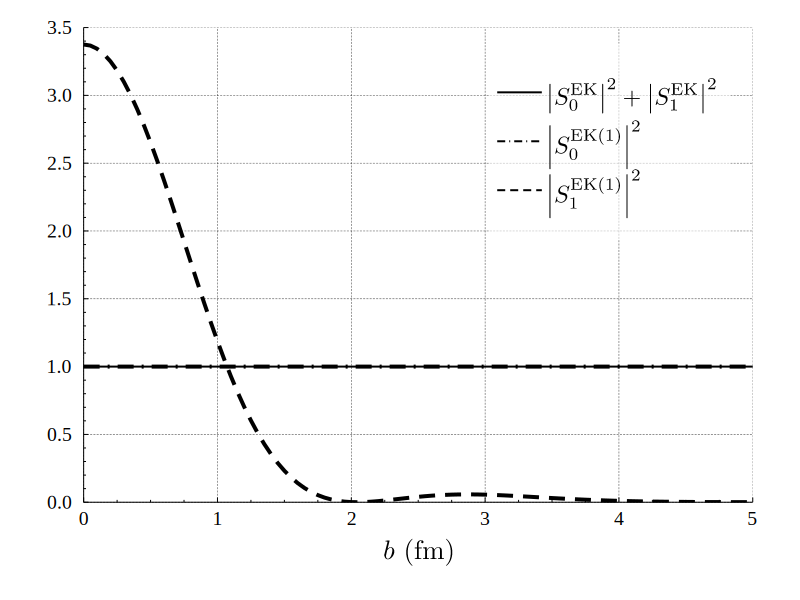

In [68]:
plt=plot(
    b,
    abs2.(S₀ᴱᴷ) .+ abs2.(S₁ᴱᴷ),
    label=L"\left| S_0^{\mathrm{EK}} \right|^2 + \left| S_1^{\mathrm{EK}} \right|^2",
    color=:black,
    xlims=(0, 5),
    ylims=(0, 3.5),
    xticks=0:1:5,
    yticks=0:0.5:3.5,
    xminorticks=4,
    yminorticks=5,
    top_margin=5mm,
    margin=10mm,
    legend=:topright,
)
plot!(
    b,
    abs2.(S₀ᴱᴷ⁽¹⁾),
    label=L"\left| S_0^{\mathrm{EK}(1)} \right|^2",
    color=:black,
    linestyle=:dashdot,
    linewidth=4
)
plot!(
    b,
    abs2.(S₁ᴱᴷ⁽¹⁾),
    label=L"\left| S_1^{\mathrm{EK}(1)} \right|^2",
    color=:black,
    linestyle=:dash,
    linewidth=4
)
xlabel!(L"b\ (\mathrm{fm})")
savefig("out/S-unitarity.svg")
display(plt)

## 動的偏極ポテンシャル

動的偏極ポテンシャル演算子$\hat{U}_{\mathrm{DP}}$ (dynamical polarization potential) の定義は

$$
\begin{align}
\hat{U}_{\mathrm{DP}} \psi_0(z,b)
&\equiv V_{01}(z,b)
\exp\left[
    \frac{1}{i \hbar c \beta_1}
    \int_{-\infty}^{z} dz^{\prime} V_{11} (z^{\prime}, b)
\right] \\
&\quad \times \left\{
    \int_{-\infty}^{z} dz^{\prime} \left[
        \frac{1}{i \hbar c \beta_1}
        V_{10} (z^{\prime}, b)
        \psi_{10} (z^{\prime}, b)
        e^{i (K_0 - K_1)z^{\prime}}
        \exp\left(
            - \frac{1}{i \hbar c \beta_1}
            \int_{-\infty}^{z^{\prime}} dz^{\prime\prime} V_{11} (z^{\prime\prime}, b)
        \right)
    \right]
\right\} e^{i(K_1 - K_0)z}
\tag{7.79}
\label{eq:UDP779}
\end{align}
$$

である.

$$
\begin{align}
\psi_1(z,b) &= \exp\left[
    \frac{1}{i\hbar c \beta_1}
    \int_{-\infty}^{z} d z^{\prime} V_{11}(z^{\prime}, b)
\right] \\
&\times
\left\{
    \int_{-\infty}^{z} d z^{\prime} \left[
        \frac{1}{i\hbar c \beta_1}
        V_{10}(z^{\prime}, b)
        \psi_0(z^{\prime}, b)
        e^{i(K_0 - K_1)z^{\prime}}
        \exp\left(
            - \frac{1}{i\hbar c \beta_1}
            \int_{-\infty}^{z^{\prime}} d z^{\prime\prime} V_{11}(z^{\prime\prime}, b)
        \right)
    \right]
\right\}
\tag{7.37}
\label{eq:psi1737}
\end{align}
$$

を思い出せば, $\hat{U}_{DP} \psi_0(z,b)$は

$$
\hat{U}_{\mathrm{DP}} \psi_0(z,b)
= V_{01}(z,b)
\psi_1(z,b)
e^{i(K_1 - K_0)z}
$$

と表せる.

等価局所ポテンシャル (trivially equivalent local potential) $\bar{U}_{\mathrm{DP}}(z,b)$は

$$
\bar{U}_{DP}(z,b)
= \frac{1}{\psi_0(z,b)} \left[
    \hat{U}_{\mathrm{DP}} \psi_0(z,b)
\right]
$$

$\bar{U}_{\mathrm{DP}}(z,b)$のような式を見たときには, ゼロ除算に注意しなければならないが, 今の場合は, $\psi_0 = 0$とならないので特に何も処理を加えずに実装する.

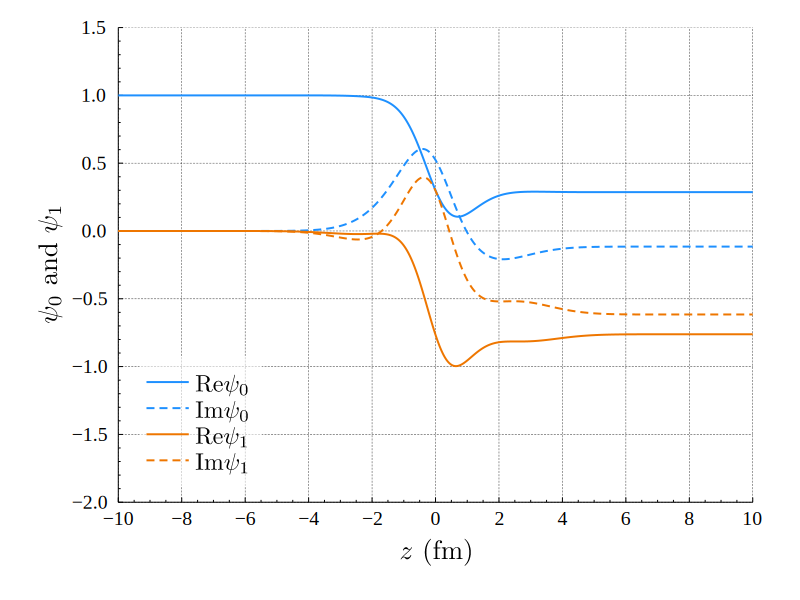

In [69]:
ψ₀, ψ₁ = findψ(z, 0)
plotψ(z, ψ₀, ψ₁)

In [70]:
function Ûdpψ₀(
        z::Vector,
        b::Number;
        N=10,
        ψ₀⁰=nothing,
        ψ₁⁰=nothing
    )
    ψ₀, ψ₁ = findψ(z, b, N=N, ψ₀⁰=ψ₀⁰, ψ₁⁰=ψ₁⁰)
    V₀₁.(z,b) .* ψ₁ .* exp.(1im .* (K₁-K₀) .* z)
end

Ûdpψ₀ (generic function with 1 method)

In [106]:
function Ūdp(
        z::Vector,
        b::Number;
        N=10,
        ψ₀⁰=nothing,
        ψ₁⁰=nothing
    )
    ψ₀, ψ₁ = findψ(z, b, N=N, ψ₀⁰=ψ₀⁰, ψ₁⁰=ψ₁⁰)
    ÛDPψ₀ = V₀₁.(z,b) .* ψ₁ .* exp.(1im .* (K₁-K₀) .* z)
    ÛDPψ₀ ./ ψ₀
end

Ūdp (generic function with 1 method)

In [107]:
ŪDP = Ūdp(z, 0);

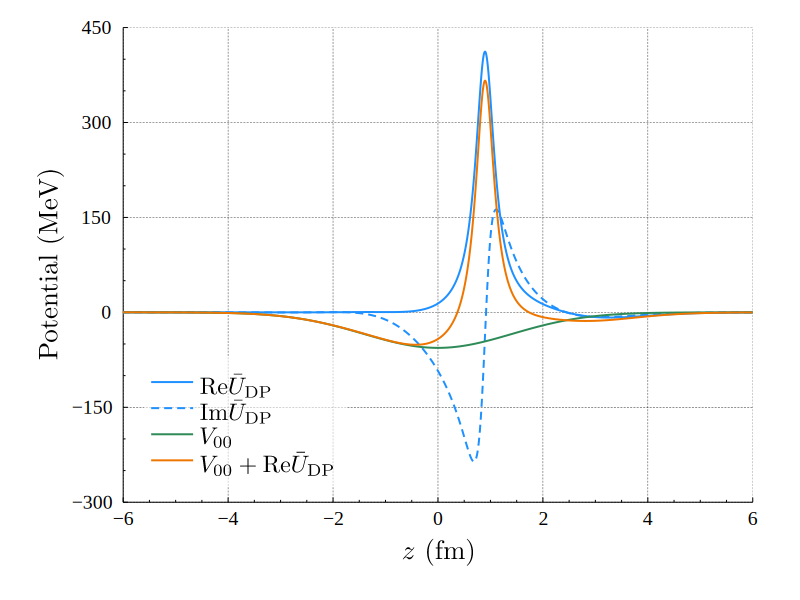

In [108]:
plt=plot(
    z,
    real(ŪDP),
    label=L"\mathrm{Re} \bar{U}_{\mathrm{DP}}",
    color=:dodgerblue,
    xlims=(-6, 6),
    ylims=(-300, 450),
    xticks=-6:2:6,
    yticks=-300:150:450,
    xminorticks=4,
    yminorticks=3,
    top_margin=5mm,
    margin=10mm,
    legend=:bottomleft,
)
plot!(
    z,
    imag(ŪDP),
    label=L"\mathrm{Im} \bar{U}_{\mathrm{DP}}",
    color=:dodgerblue,
    linestyle=:dash,
)
plot!(
    z,
    V₀₀.(z,0),
    label=L"V_{00}",
    color=:seagreen,
)
plot!(
    z,
    V₀₀.(z,0) + real(ŪDP),
    label=L"V_{00} + \mathrm{Re} \bar{U}_{\mathrm{DP}}",
    color=:darkorange2,
)

xlabel!(L"z \ (\mathrm{fm})")
ylabel!(L"\mathrm{Potential \ (MeV)}")
savefig("out/UDP.svg")
display(plt)

### $b$依存性を見てみる

In [124]:
function subplotŪ(
        z, b;
        size=(600,400),
        title=nothing,
        legend=:bottomleft,
        drawxlabel=false,
        drawylabel=false,
        xformatter=:auto,
        yformatter=:auto,
    )
    leftmargin=0mm
    if drawylabel
        leftmargin=5mm
    end
    ŪDP = Ūdp(z, b)
    plt=plot(
        z,
        real(ŪDP),
        label=L"\mathrm{Re} \bar{U}_{\mathrm{DP}}",
        color=:dodgerblue,
        xlims=(-6, 6),
        ylims=(-300, 450),
        xticks=-6:2:6,
        yticks=-300:150:450,
        xminorticks=4,
        yminorticks=3,
        topmargin=0mm,
        bottommargin=0mm,
        leftmargin=leftmargin,
        labelfontsize=16,
        tickfontsize=12,
        legendfontsize=12,
        legend=legend,
        size=size,
        xformatter=xformatter,
        yformatter=yformatter
    )
    plot!(
        z,
        imag(ŪDP),
        color=:dodgerblue,
        linestyle=:dash,
        label=L"\mathrm{Im} \bar{U}_{\mathrm{DP}}",
    )
    plot!(
        z,
        V₀₀.(z,b),
        label=L"V_{00}",
        color=:seagreen,
    )
    plot!(
        z,
        V₀₀.(z,b) + real(ŪDP),
        label=L"V_{00} + \mathrm{Re} \bar{U}_{\mathrm{DP}}",
        color=:darkorange2,
    )
    if !isnothing(title)
        annotate!(-3, -200, text(title, 16))
    end
    if drawxlabel
        xlabel!(L"z \ (\mathrm{fm})")
    end
    if drawylabel
        ylabel!(L"\mathrm{Potential \ (MeV)}")
    end
    plt
end

subplotŪ (generic function with 1 method)

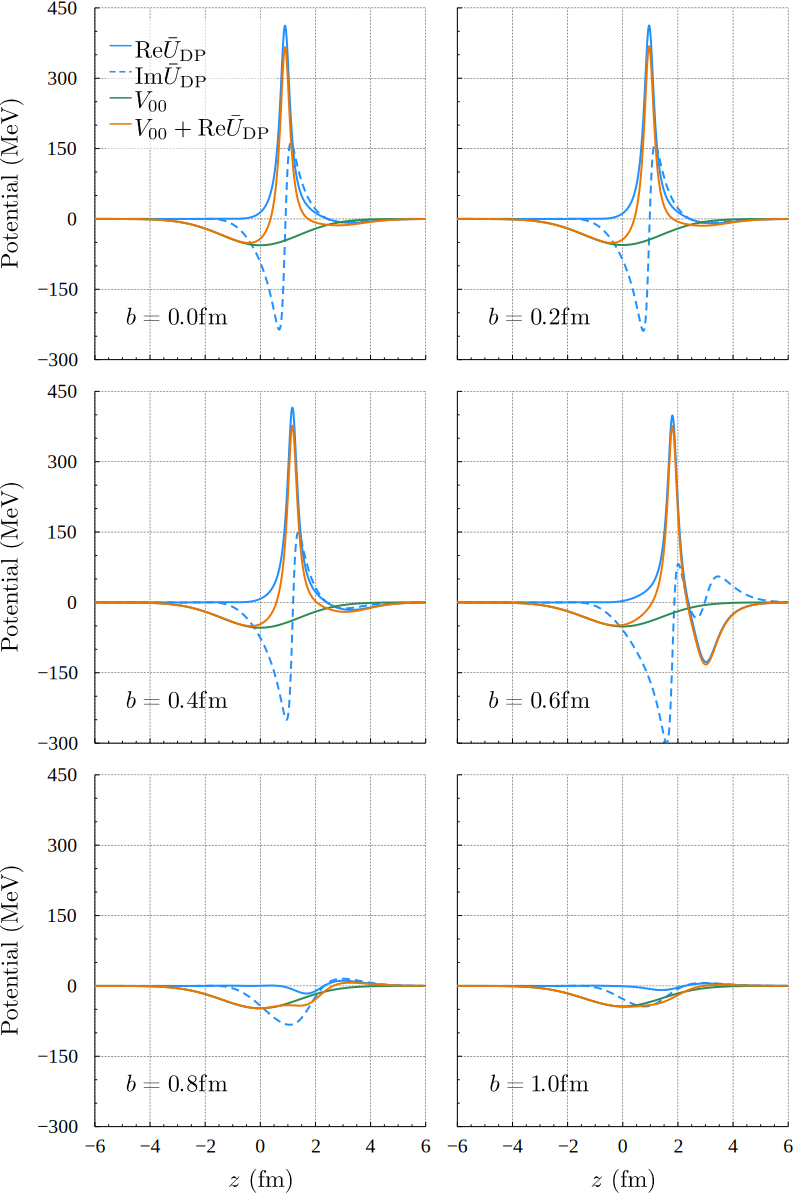

In [126]:
bs = 0:0.2:1
legend = [:topleft, false, false, false, false, false]
drawxlabel = [false, false, false, false, true, true]
drawylabel = [true, false, true, false, true, false]
xformatter = [
    _->"", _->"", _->"", _->"", :auto, :auto
]
yformatter = [
    :auto, _->"", :auto, _->"", :auto, _->""
]
subplts = Vector{Plots.Plot}(undef, 6)

for (i, bᵢ) in enumerate(bs)
    subplts[i] = subplotŪ(
        z, bᵢ,
        title=L"b=%$bᵢ\mathrm{fm}",
        legend=legend[i],
        drawxlabel=drawxlabel[i],
        drawylabel=drawylabel[i],
        xformatter=xformatter[i],
        yformatter=yformatter[i]
    )
end

plt=plot(
    subplts...,
    size=(800,1200),
    layout = (3,2)
)
savefig("out/U_bs.svg")
display(plt)